# Programming for Data Analysis Assignment

![pic](https://moriohcdn.b-cdn.net/ff3cc511fb.png)

# PROBLEM STATEMENT
For this project you must create a data set by simulating a real-world phenomenon of
your choosing. You may pick any phenomenon you wish – you might pick one that is
of interest to you in your personal or professional life. Then, rather than collect data
related to the phenomenon, you should model and synthesise such data using Python.
We suggest you use the numpy.random package for this purpose.
Specifically, in this project you should:
• Choose a real-world phenomenon that can be measured and for which you could
collect at least one-hundred data points across at least four different variables.
• Investigate the types of variables involved, their likely distributions, and their
relationships with each other.
• Synthesise/simulate a data set as closely matching their properties as possible.
• Detail your research and implement the simulation in a Jupyter notebook – the
data set itself can simply be displayed in an output cell within the notebook.
Note that this project is about simulation – you must synthesise a data set. Some
students may already have some real-world data sets in their own files. It is okay to
base your synthesised data set on these should you wish (please reference it if you do),
but the main task in this project is to create a synthesised data set. The next section
gives an example project idea.

# INTRODUCTION
As a golf enthusiast myself I picked the real-world phenomenon of the performance of golfers 
playing professionally on the PGA TOUR and DP World Tour. After some research, I decide that the most interesting
variable related to this is the Average Score of each player calculated over the 2022/2023 season - this is going to be
one of my variables (Average Score). The other variables are rank, strokes and rounds.

# INVESTIGATION OF REAL WORLD DATA PHENOMENON
## COLLECTION OF DATA POINTS

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import scipy
from scipy.stats import norm
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# https://www.pgatour.com/stats/detail/120
df = pd.read_csv('pgatour_2022-2023_actualaveragescore.csv')
df

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG,TOTAL STROKES,TOTAL ROUNDS
0,1,0,46046,Scottie Scheffler,68.26,6007,88
1,2,0,46970,Jon Rahm,68.82,4886,71
2,3,0,35450,Patrick Cantlay,68.83,4956,72
3,4,0,46717,Viktor Hovland,68.92,6065,88
4,4,0,28237,Rory McIlroy,68.92,4411,64
...,...,...,...,...,...,...,...
186,187,-3,51950,Max McGreevy,71.60,6444,90
187,188,-2,32662,Michael Gligic,71.72,5092,71
188,189,-2,29970,Dylan Frittelli,71.84,5460,76
189,190,-2,27095,Nick Watney,72.08,5334,74


In [3]:
df = df.drop('MOVEMENT',axis=1)

In [4]:
df = df.drop('PLAYER_ID',axis=1)

In [5]:
df

,RANK,PLAYER,AVG,TOTAL STROKES,TOTAL ROUNDS
0,1,Scottie Scheffler,68.26,6007,88
1,2,Jon Rahm,68.82,4886,71
2,3,Patrick Cantlay,68.83,4956,72
3,4,Viktor Hovland,68.92,6065,88
4,4,Rory McIlroy,68.92,4411,64
...,...,...,...,...,...
186,187,Max McGreevy,71.60,6444,90
187,188,Michael Gligic,71.72,5092,71
188,189,Dylan Frittelli,71.84,5460,76
189,190,Nick Watney,72.08,5334,74


In [6]:
df["TOUR"] = "PGA TOUR"
df

,RANK,PLAYER,AVG,TOTAL STROKES,TOTAL ROUNDS,TOUR
0,1,Scottie Scheffler,68.26,6007,88,PGA TOUR
1,2,Jon Rahm,68.82,4886,71,PGA TOUR
2,3,Patrick Cantlay,68.83,4956,72,PGA TOUR
3,4,Viktor Hovland,68.92,6065,88,PGA TOUR
4,4,Rory McIlroy,68.92,4411,64,PGA TOUR
...,...,...,...,...,...,...
186,187,Max McGreevy,71.60,6444,90,PGA TOUR
187,188,Michael Gligic,71.72,5092,71,PGA TOUR
188,189,Dylan Frittelli,71.84,5460,76,PGA TOUR
189,190,Nick Watney,72.08,5334,74,PGA TOUR


##  DISTRIBUTIONS
- Normal Distribution
- Uniform distribution

### Average Score(AVG) follows a Normal Distribution :
About 68% of values drawn from a normal distribution are within one standard deviation σ away from the mean; about 95% of the values lie within two standard deviations; and about 99.7% are within three standard deviations.[6] This fact is known as the 68-95-99.7 (empirical) rule, or the 3-sigma rule.

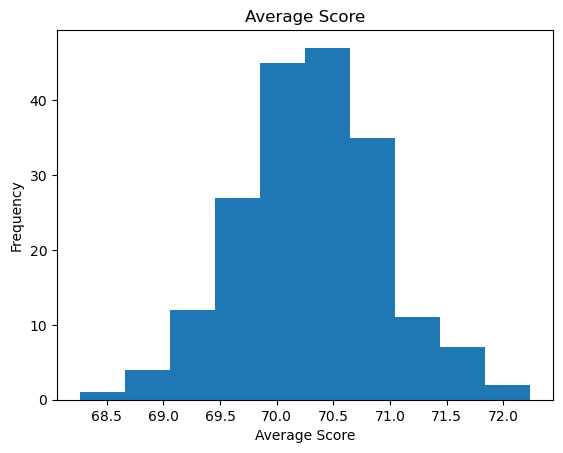

In [7]:
# Average Score follows a Normal Distribution
# Plot Average Score data from pgatour_golfstats_2022-2023_averagescore.csv
AVG = df.AVG
#plt.hist(AVG)
#plt.show()

# Creating histogram 
fig, ax = plt.subplots(1, 1) 
ax.hist(AVG) 
  
# Set title 
ax.set_title("Average Score") 
  
# adding labels 
ax.set_xlabel('Average Score') 
ax.set_ylabel('Frequency') 

plt.show()

#### Mean
As you can see, the histogram above fits classic the bell curve shape of the normal distribution with most of the values centered around the mean of 70.30324607329841.

In [8]:
mean = df.AVG.mean()
mean

70.30324607329841

#### Standard Deviation
In statistics, the standard deviation is a measure of the amount of variation or dispersion of a set of values. A low standard deviation indicates that the values tend to be close to the mean of the set, while a high standard deviation indicates that the values are spread out over a wider range. A standard deviation of 0.6373654137997954 is considered low. 

In [9]:
std = df.AVG.std()
std

0.6373654137997954

#### BEST-FIT DISTRIBUTION

In [10]:
from scipy import stats
dist = stats.norm
data = AVG
bounds = [(68, 73), (0, 191)]
res = stats.fit(dist, data, bounds)
res

C:\Users\Fujitsu\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1652: RuntimeWarning: overflow encountered in true_divide
  x = asarray((x-loc) / scale)


  params: FitParams(loc=70.28557973530388, scale=0.6416421219937547)
 success: True
 message: 'Optimization terminated successfully.'

In [11]:
res.params

FitParams(loc=70.28557973530388, scale=0.6416421219937547)

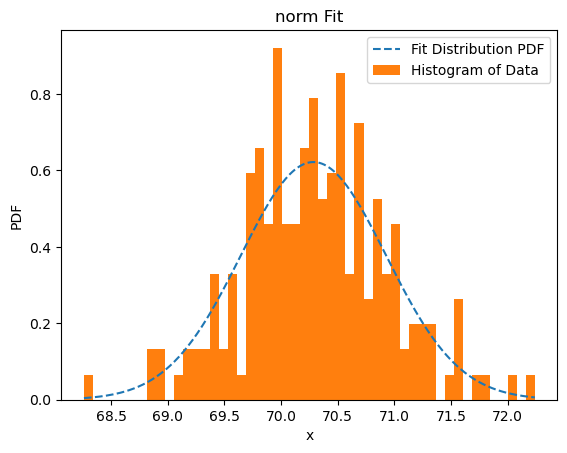

In [12]:
res.plot()
plt.show()

C:\Users\Fujitsu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


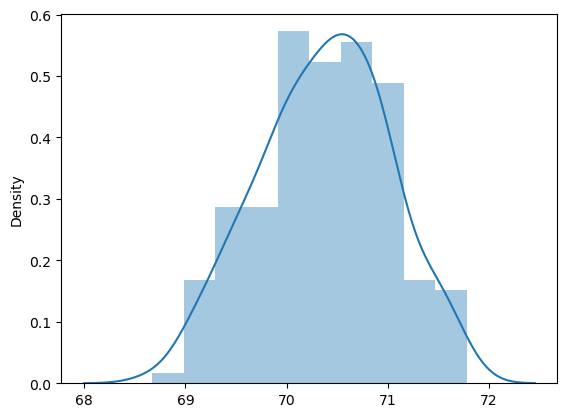

In [13]:
import seaborn as sns
from scipy.stats import norm

data = norm.rvs(70.30324607329841,0.6373654137997954,size=191) # you can use a pandas series or a list if you want

sns.distplot(data)
plt.show()

## RANK is uniformly distributed (not exactly uniform though)
In probability theory and statistics, the discrete uniform distribution is a symmetric probability distribution wherein a finite number of values are equally likely to be observed; every one of n values has equal probability 1/n. Another way of saying "discrete uniform distribution" would be "a known, finite number of outcomes equally likely to happen".

RANK is approximately uniformly distributed but not exactly uniform because there are a small few players who are tied. 
For example, Viktor Hovland and Rory McIlroy are both ranked 4th. Both players have the same Average Score (68.92). And nobody is ranked 5th. The next rank after 4th is 6th. As a result, the distribution is not exactly uniform.  

In [14]:
RANK = df.RANK
RANK

0        1
1        2
2        3
3        4
4        4
      ... 
186    187
187    188
188    189
189    190
190    191
Name: RANK, Length: 191, dtype: int64

In [15]:
x, counts = np.unique(RANK, return_counts=True)
x, counts

(array([  1,   2,   3,   4,   6,   7,   8,   9,  10,  11,  13,  14,  16,
         17,  18,  19,  20,  22,  23,  25,  26,  27,  30,  32,  34,  35,
         37,  39,  41,  43,  44,  45,  46,  47,  49,  52,  55,  57,  59,
         60,  63,  64,  66,  67,  70,  72,  73,  74,  78,  80,  81,  85,
         86,  87,  90,  91,  92,  93,  95,  98, 100, 102, 104, 105, 106,
        107, 109, 110, 112, 113, 116, 117, 118, 119, 123, 125, 126, 127,
        128, 130, 131, 132, 133, 134, 135, 136, 137, 139, 141, 143, 145,
        146, 147, 148, 149, 150, 151, 152, 154, 155, 156, 157, 158, 160,
        162, 163, 164, 165, 167, 168, 170, 171, 172, 173, 174, 175, 176,
        177, 178, 179, 180, 181, 182, 183, 184, 186, 187, 188, 189, 190,
        191], dtype=int64),
 array([1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 3,
        2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 3, 3, 2, 2, 1, 3, 1, 2, 1, 3,
        2, 1, 1, 4, 2, 1, 4, 1, 1, 3, 1, 1, 1, 2, 3, 2, 2, 2, 1, 1, 1, 2,
        1, 2, 1, 3, 

In [16]:
RANK = np.array(RANK)

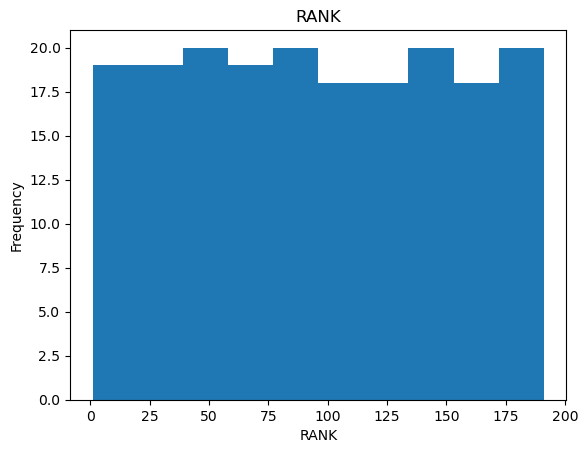

In [17]:
# RANK is uniformly distributed
#plt.hist(RANK)
# Creating histogram 
fig, ax = plt.subplots(1, 1) 
ax.hist(RANK) 
  
# Set title 
ax.set_title("RANK") 
  
# adding labels 
ax.set_xlabel('RANK') 
ax.set_ylabel('Frequency') 

plt.show()

#  SYNTHESIZE / SIMULATE A DATA SET

In [18]:
low = 1
high = len(df.index)+1
size = 1
syn_rank = np.arange(low,high,size)
syn_rank

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [19]:
x, counts = np.unique(syn_rank, return_counts=True)
x, counts

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

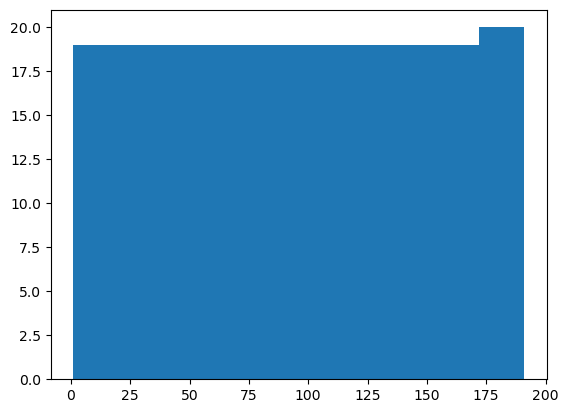

In [20]:
plt.hist(syn_rank)
plt.show()

In [21]:
low = 1
high = 191
size = 191

In [22]:
rng = np.random.default_rng()
rand_ints = rng.integers(low=low, high=high+1, size=size)
rand_ints

array([160,   1,  65,  43,  18,  87, 161,  82, 127, 122, 131,  40,  27,
        14,  66, 176,  92,  21,  84, 182,  67,  50,  68,   3,  50, 184,
       128, 104, 155, 181,  88, 177,  35,  14,  32,  70,  79,  93,  60,
       120,  14, 189,  46,  54,  41,   1,  32,  52,  63, 146,  68, 119,
       163, 150, 184, 104, 107,  16, 175,  58,  14,  46, 156,  15,  55,
       132, 148,   8,  82,  71, 100,  50, 166,  41, 110, 183,  89,   7,
        32, 108, 167,   7,  58,   8, 186,  59, 181,  32, 166,  60,  98,
       103, 113, 177,  37,  78, 127, 171, 184, 141,  10,  85,  28,  78,
       175,   3,  89,  89,  44, 167,  35, 183, 101,  42, 108,  13,  28,
        94, 165,  78, 166,  31, 186,   2, 138, 118, 123, 181,  53,  14,
       151,  67,  91, 181,  93,  37, 171, 179,  53, 116,  25, 104, 132,
       141, 102, 135, 115, 105, 146,  49,  47,  43,  57, 110, 170,  74,
        38,  25,  78,  20,  87, 175,  11, 172,  66,  51,   2, 182, 134,
       143,  18,  33,  15, 166, 134, 103,  23, 180,  11, 119,  8

In [23]:
# rng.integers is a very good way to model the RANK variable because most of the values are unique. 
#A small number of values are repeated though which is what we see the the real-world data from the PGA TOUR.

x, counts = np.unique(rand_ints, return_counts=True)
x, counts

(array([  1,   2,   3,   7,   8,   9,  10,  11,  13,  14,  15,  16,  18,
         20,  21,  23,  24,  25,  27,  28,  31,  32,  33,  35,  37,  38,
         39,  40,  41,  42,  43,  44,  46,  47,  49,  50,  51,  52,  53,
         54,  55,  57,  58,  59,  60,  63,  65,  66,  67,  68,  70,  71,
         74,  78,  79,  82,  84,  85,  87,  88,  89,  91,  92,  93,  94,
         98, 100, 101, 102, 103, 104, 105, 107, 108, 110, 113, 115, 116,
        118, 119, 120, 122, 123, 127, 128, 131, 132, 134, 135, 138, 141,
        142, 143, 146, 148, 150, 151, 155, 156, 160, 161, 163, 165, 166,
        167, 170, 171, 172, 175, 176, 177, 179, 180, 181, 182, 183, 184,
        186, 189, 190], dtype=int64),
 array([2, 2, 2, 2, 2, 1, 1, 2, 1, 5, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 4,
        1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 3, 1, 1, 2, 1, 1, 1, 2, 1,
        2, 1, 2, 2, 2, 2, 1, 1, 2, 4, 1, 2, 1, 1, 2, 1, 4, 1, 1, 2, 1, 1,
        1, 1, 1, 2, 3, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2,
        1

In [24]:
syn_rank = np.sort(rand_ints)
syn_rank

array([  1,   1,   2,   2,   3,   3,   7,   7,   8,   8,   9,  10,  11,
        11,  13,  14,  14,  14,  14,  14,  15,  15,  16,  18,  18,  20,
        21,  23,  24,  25,  25,  27,  28,  28,  31,  32,  32,  32,  32,
        33,  35,  35,  37,  37,  38,  39,  40,  41,  41,  42,  43,  43,
        44,  46,  46,  47,  49,  50,  50,  50,  51,  52,  53,  53,  54,
        55,  57,  58,  58,  59,  60,  60,  63,  65,  65,  66,  66,  67,
        67,  68,  68,  70,  71,  74,  74,  78,  78,  78,  78,  79,  82,
        82,  84,  85,  87,  87,  88,  89,  89,  89,  89,  91,  92,  93,
        93,  94,  98, 100, 101, 102, 103, 103, 104, 104, 104, 105, 107,
       108, 108, 110, 110, 113, 115, 116, 118, 119, 119, 120, 122, 123,
       127, 127, 128, 131, 132, 132, 134, 134, 135, 138, 141, 141, 142,
       143, 146, 146, 148, 150, 151, 155, 156, 156, 160, 161, 163, 163,
       165, 166, 166, 166, 166, 167, 167, 170, 171, 171, 172, 175, 175,
       175, 176, 177, 177, 179, 180, 181, 181, 181, 181, 182, 18

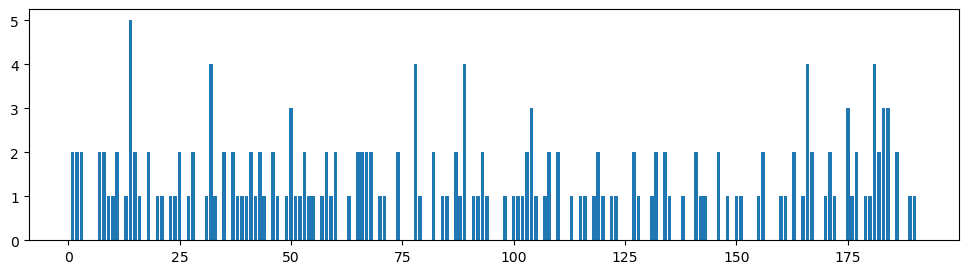

In [25]:
# Create an empty plot.
fig, ax = plt.subplots(figsize=(12, 3))

# Plot a bar chart.
ax.bar(x, counts);

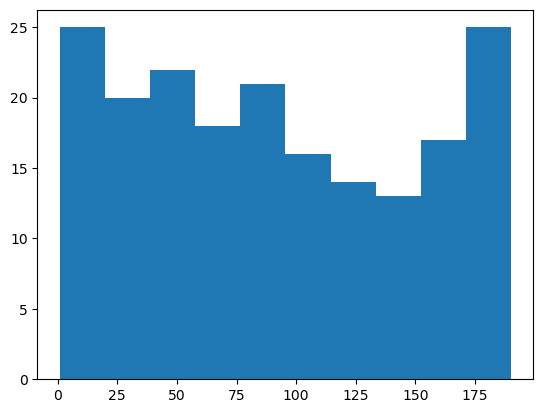

In [26]:
plt.hist(rand_ints)
plt.show()

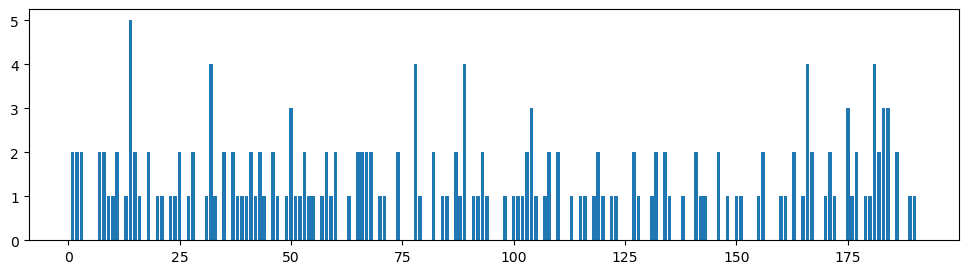

In [27]:
# Create an empty plot.
fig, ax = plt.subplots(figsize=(12, 3))

# Plot a bar chart.
ax.bar(x, counts);

In [28]:
np.random.randint(1,191)

141

In [29]:
L = [np.random.randint(1,191) for i in range(191)]
L

[160,
 94,
 114,
 29,
 14,
 169,
 125,
 33,
 157,
 130,
 110,
 178,
 51,
 2,
 135,
 96,
 72,
 135,
 26,
 9,
 39,
 73,
 149,
 34,
 186,
 58,
 82,
 157,
 187,
 148,
 25,
 87,
 28,
 6,
 138,
 5,
 122,
 13,
 131,
 3,
 119,
 49,
 100,
 182,
 89,
 175,
 179,
 75,
 136,
 121,
 175,
 174,
 132,
 69,
 184,
 84,
 156,
 4,
 162,
 160,
 31,
 100,
 33,
 79,
 185,
 80,
 118,
 23,
 97,
 85,
 89,
 167,
 149,
 7,
 145,
 89,
 173,
 45,
 87,
 2,
 31,
 69,
 51,
 141,
 129,
 139,
 17,
 104,
 23,
 32,
 143,
 9,
 126,
 75,
 90,
 48,
 54,
 158,
 28,
 131,
 64,
 20,
 152,
 163,
 69,
 80,
 134,
 125,
 17,
 19,
 104,
 74,
 159,
 37,
 82,
 49,
 156,
 121,
 174,
 71,
 188,
 20,
 55,
 188,
 8,
 133,
 107,
 151,
 154,
 30,
 62,
 56,
 125,
 50,
 139,
 182,
 44,
 106,
 61,
 27,
 136,
 117,
 64,
 130,
 114,
 47,
 139,
 42,
 126,
 168,
 23,
 38,
 128,
 118,
 63,
 130,
 134,
 84,
 60,
 120,
 123,
 176,
 10,
 90,
 146,
 4,
 51,
 45,
 128,
 119,
 107,
 3,
 38,
 160,
 136,
 148,
 66,
 149,
 130,
 96,
 88,
 16,
 64,
 144,
 1

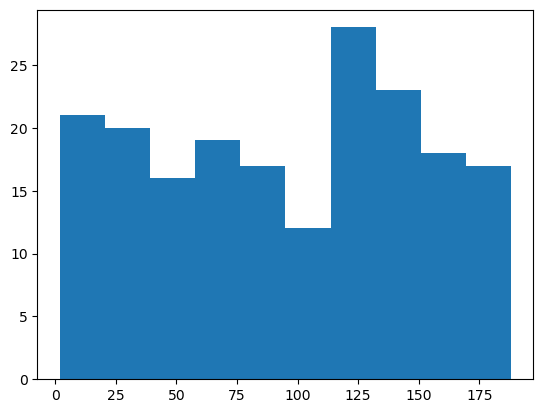

In [30]:
plt.hist(L)
plt.show()

In [31]:
size = len(df.index)
size

191

In [32]:
# Synthesize a random normal distribution for Average Score
syn_avg = np.random.normal(mean,std,size)
syn_avg

array([71.41225718, 69.32636579, 69.56930722, 70.34130491, 70.01312343,
       70.78220515, 70.97296975, 69.86819868, 69.40443935, 69.95557878,
       69.06417534, 71.4340249 , 70.09327523, 70.22049698, 70.31808626,
       70.1977651 , 70.18323304, 70.88489475, 70.14291356, 70.46921443,
       70.03671125, 70.08647489, 70.04447175, 69.70604342, 70.20811875,
       70.41736981, 71.09112948, 69.59520757, 69.73294141, 69.40219065,
       70.58627183, 69.93680188, 72.01900957, 70.75567202, 71.14086835,
       70.91690015, 70.87866598, 70.89497814, 69.92974736, 69.0941465 ,
       70.79957005, 70.09065726, 71.27171304, 70.14941756, 69.29822664,
       69.69927305, 70.27525309, 69.42740249, 70.79795324, 69.27781674,
       70.20289727, 70.84491116, 70.93278888, 70.06073623, 70.90870427,
       70.36650755, 69.03162841, 68.78142631, 71.94619327, 70.36641143,
       70.10581889, 70.95102158, 70.12290701, 69.57805254, 70.73303089,
       70.25188324, 70.04469554, 70.70437637, 70.22463275, 69.59

In [33]:
sort_avg = np.sort(syn_avg)
sort_avg
#sort_y = pd.DataFrame(norm_y) 
#sort_y.sort_values(0, ascending=True).to_numpy()
#sort_y

array([68.78142631, 69.03162841, 69.06417534, 69.0941465 , 69.09554967,
       69.16365909, 69.16372707, 69.27781674, 69.29195454, 69.29822664,
       69.32636579, 69.35305902, 69.39285318, 69.40219065, 69.40443935,
       69.42740249, 69.47982821, 69.51896021, 69.55533889, 69.56930722,
       69.57805254, 69.57970834, 69.59520757, 69.59837249, 69.68137762,
       69.69141186, 69.69927305, 69.70604342, 69.71385422, 69.73282538,
       69.73294141, 69.73377844, 69.73519043, 69.73940645, 69.7863558 ,
       69.80636704, 69.80745603, 69.81551228, 69.83128498, 69.85526552,
       69.86819868, 69.87929839, 69.88881737, 69.89864395, 69.90067567,
       69.90375804, 69.90660219, 69.91249948, 69.92037245, 69.92974736,
       69.93680188, 69.93959008, 69.95440848, 69.95557878, 69.97335224,
       69.98562703, 69.99317265, 70.00987823, 70.01312343, 70.02224079,
       70.03217773, 70.03294294, 70.03671125, 70.04344757, 70.04447175,
       70.04469554, 70.05578899, 70.06073623, 70.08098903, 70.08

In [34]:
df = df.rename(columns={'AVG': 'SCORE','TOTAL STROKES': 'STROKES', 'TOTAL ROUNDS': 'ROUNDS'})
df

,RANK,PLAYER,SCORE,STROKES,ROUNDS,TOUR
0,1,Scottie Scheffler,68.26,6007,88,PGA TOUR
1,2,Jon Rahm,68.82,4886,71,PGA TOUR
2,3,Patrick Cantlay,68.83,4956,72,PGA TOUR
3,4,Viktor Hovland,68.92,6065,88,PGA TOUR
4,4,Rory McIlroy,68.92,4411,64,PGA TOUR
...,...,...,...,...,...,...
186,187,Max McGreevy,71.60,6444,90,PGA TOUR
187,188,Michael Gligic,71.72,5092,71,PGA TOUR
188,189,Dylan Frittelli,71.84,5460,76,PGA TOUR
189,190,Nick Watney,72.08,5334,74,PGA TOUR


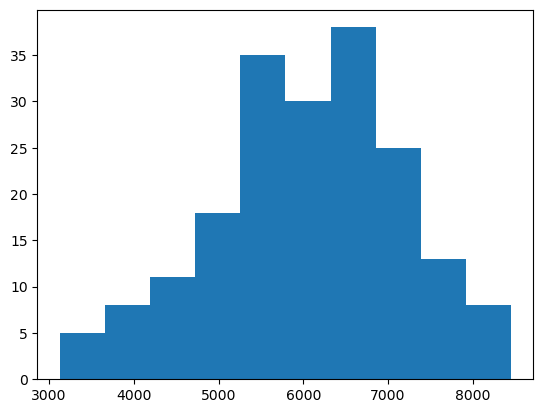

In [35]:
# Total Strokes follows a Normal Distribution
# Plot Total Strokes data from pgatour_golfstats_2022-2023_averagescore.csv
STROKES = df.STROKES
plt.hist(STROKES)
plt.show()

In [36]:
mean_strokes = df.STROKES.mean()
mean_strokes

6058.560209424084

In [37]:
std_strokes = df.STROKES.std()
std_strokes

1134.2457615841176

In [38]:
# Synthesize a random normal distribution for STROKES
norm_strokes = np.random.normal(mean_strokes,std_strokes,size)
norm_strokes

array([5926.93746297, 6261.18603444, 6626.36419637, 5589.62836322,
       6892.50892816, 5864.31382787, 5470.68224355, 7766.96752502,
       5268.45014119, 7238.48332667, 6378.80670302, 7208.70876332,
       6794.19833287, 5219.33928409, 4983.98859392, 6332.27819285,
       5128.91368823, 4614.96832094, 8444.68422959, 6048.6601112 ,
       4967.06192771, 4961.77876611, 8019.43722342, 7688.55970608,
       7602.85253493, 4703.2283054 , 5717.04679581, 7379.74818183,
       4735.16574396, 5517.59696588, 6834.864531  , 5451.111964  ,
       6067.89934798, 6986.45785997, 5612.55451696, 4355.263026  ,
       6278.51412434, 6018.10049583, 6583.03887559, 6674.98460135,
       7293.24296577, 6271.03879915, 7176.92111702, 7569.30166823,
       7141.7796104 , 4347.24072889, 5937.35840799, 3562.2298315 ,
       5384.13472812, 5655.39453393, 8070.6399225 , 5731.79243013,
       8231.38000839, 5171.90589799, 4000.25129492, 5495.50928786,
       6128.67812328, 7274.24196773, 8539.07548416, 4761.80148

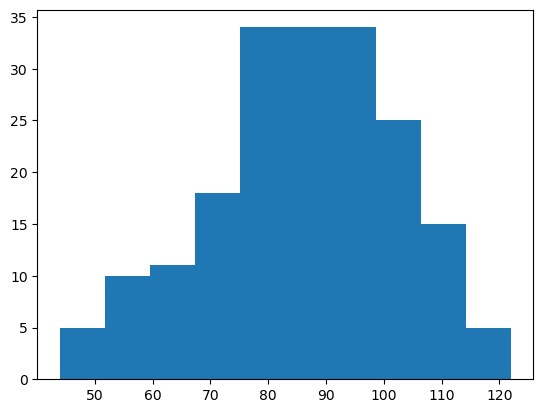

In [39]:
# ROUNDS follows a Normal Distribution
# Plot ROUNDS data from pgatour_golfstats_2022-2023_averagescore.csv
ROUNDS = df.ROUNDS
plt.hist(ROUNDS)
plt.show()

In [40]:
mean_rounds = df.ROUNDS.mean()
mean_rounds

86.22513089005236

In [41]:
std_rounds = df.ROUNDS.std()
std_rounds

16.359018013851397

In [42]:
# Synthesize a random normal distribution for ROUNDS
norm_rounds = np.random.normal(mean_rounds,std_rounds,size)
norm_rounds

array([ 97.37905574, 100.91432709, 115.77092278,  71.55558861,
        71.52413699,  89.11549271,  94.2663757 ,  94.12901651,
        75.38656111,  72.07782333,  80.320001  , 104.20033314,
        75.30779318,  75.53569098,  82.21405124, 115.99972914,
        74.79247062,  93.07173511, 100.60435874,  73.70717095,
        89.72244082,  83.64523844,  54.10291001, 112.04100187,
        57.3652134 , 119.56038215,  96.46628687,  89.17542316,
        75.52919804,  75.78735732,  89.66673968, 106.79058995,
       101.76675642, 101.58630879,  59.78631995,  84.29207413,
        80.70770034,  95.0738534 ,  72.33045611,  84.83816847,
        95.3977722 ,  99.5254525 , 101.29840668,  90.88058537,
        78.20822673,  34.68316997,  81.22528774, 114.30584671,
        82.51985975,  56.68091542,  81.49576933,  51.03244109,
        75.50275211,  90.59515845,  63.8102235 ,  48.49080776,
        98.75149481,  89.64311412,  94.33808244,  69.26377536,
       107.24273352, 107.8128483 ,  80.70265799,  85.40

##  DATA FRAME OF SYNTHESIZED DATA

In [43]:
syn_df = pd.DataFrame(dict(RANK=np.arange(1,192,1),
                       AVERAGE=np.random.normal(mean,std,size), STROKES=np.random.normal(mean_strokes,std_strokes,size), ROUNDS = np.random.normal(mean_rounds,std_rounds,size)),
                  columns=['RANK', 'AVERAGE', 'STROKES', 'ROUNDS'])
syn_df

,RANK,AVERAGE,STROKES,ROUNDS
0,1,71.590582,5583.129716,112.690987
1,2,71.036661,3758.868001,62.345423
2,3,70.580532,8764.250981,109.510366
3,4,70.750726,7215.648764,65.961713
4,5,70.604535,4306.236187,101.203306
...,...,...,...,...
186,187,69.632843,6017.352590,82.132275
187,188,70.271552,5459.819012,86.794345
188,189,70.347496,6815.003159,72.023596
189,190,70.026759,8355.091167,80.788129


In [44]:
#norm_avg = np.random.normal(mean,std,size)
#syn_df = pd.DataFrame(dict(RANK=np.arange(1,192,1),
#                       AVERAGE=np.random.normal(mean,std,size), STROKES=np.random.normal(mean_strokes,std_strokes,size), ROUNDS = np.random.normal(mean_rounds,std_rounds,size)),
#                  columns=['RANK', 'AVERAGE', 'STROKES', 'ROUNDS'])
my_dict = {'RANK' : syn_rank, 'AVERAGE' : sort_avg, 'STROKES' : norm_strokes, 'ROUNDS' : norm_rounds}
syn_df = pd.DataFrame(my_dict)
syn_df

,RANK,AVERAGE,STROKES,ROUNDS
0,1,68.781426,5926.937463,97.379056
1,1,69.031628,6261.186034,100.914327
2,2,69.064175,6626.364196,115.770923
3,2,69.094147,5589.628363,71.555589
4,3,69.095550,6892.508928,71.524137
...,...,...,...,...
186,184,71.703607,7977.394143,93.875476
187,186,71.911116,3856.364435,96.610400
188,186,71.946193,6290.913239,92.804260
189,189,71.995519,7487.304461,101.823422


## DATA TYPES

In [45]:
syn_df.dtypes

RANK         int64
AVERAGE    float64
STROKES    float64
ROUNDS     float64
dtype: object

In [46]:
#https://stackoverflow.com/questions/66969078/set-decimal-precision-of-a-pandas-dataframe-column-with-a-datatype-of-decimal
syn_df.AVERAGE = syn_df.AVERAGE.round(2)
syn_df.AVERAGE

0      68.78
1      69.03
2      69.06
3      69.09
4      69.10
       ...  
186    71.70
187    71.91
188    71.95
189    72.00
190    72.02
Name: AVERAGE, Length: 191, dtype: float64

**Integers**

$\mathbb{Z} = \{ \ldots, -3, -2, -1, 0, 1, 2, 3, \ldots \}$

**Naturals**

$\mathbb{N} = \{1, 2, 3, \ldots\}$

$\mathbb{N}_0 = \{0, 1, 2, 3, \ldots\}$

**Reals**

$ \mathbb{R} $

![Real Number Line](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d7/Real_number_line.svg/689px-Real_number_line.svg.png)

In [47]:
syn_df.STROKES = syn_df.STROKES.astype(int)
syn_df.ROUNDS = syn_df.ROUNDS.astype(int)
syn_df

,RANK,AVERAGE,STROKES,ROUNDS
0,1,68.78,5926,97
1,1,69.03,6261,100
2,2,69.06,6626,115
3,2,69.09,5589,71
4,3,69.10,6892,71
...,...,...,...,...
186,184,71.70,7977,93
187,186,71.91,3856,96
188,186,71.95,6290,92
189,189,72.00,7487,101


In [48]:
syn_df["TOUR"] = "PGA TOUR"
syn_df

,RANK,AVERAGE,STROKES,ROUNDS,TOUR
0,1,68.78,5926,97,PGA TOUR
1,1,69.03,6261,100,PGA TOUR
2,2,69.06,6626,115,PGA TOUR
3,2,69.09,5589,71,PGA TOUR
4,3,69.10,6892,71,PGA TOUR
...,...,...,...,...,...
186,184,71.70,7977,93,PGA TOUR
187,186,71.91,3856,96,PGA TOUR
188,186,71.95,6290,92,PGA TOUR
189,189,72.00,7487,101,PGA TOUR


In [49]:
#syn_df = syn_df.sort_values([])
#syn_df

In [50]:
#df = df.rename(columns={'TOTAL STROKES': 'STROKES', 'oldName2': 'newName2'})
#strokes = df.TOTAL STROKES
#plt.hist(strokes)
#plt.show()

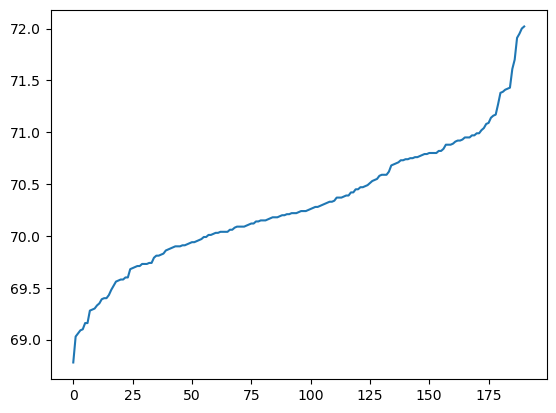

In [51]:
plt.plot(syn_df.AVERAGE)
plt.show()

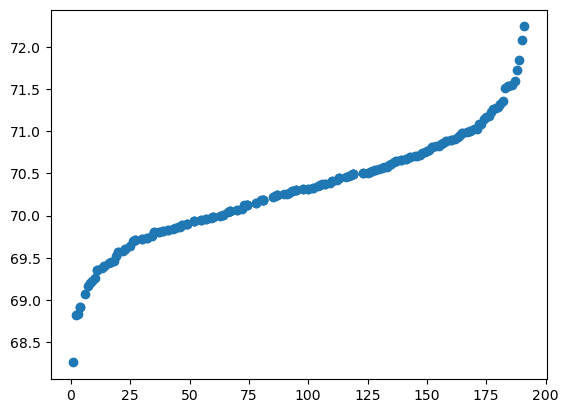

In [52]:
plt.scatter(RANK,AVG)
plt.show()

In [53]:
RANK = np.array(RANK)
RANK

array([  1,   2,   3,   4,   4,   6,   7,   8,   9,  10,  11,  11,  13,
        14,  14,  16,  17,  18,  19,  20,  20,  22,  23,  23,  25,  26,
        27,  27,  27,  30,  30,  32,  32,  34,  35,  35,  37,  37,  39,
        39,  41,  41,  43,  44,  45,  46,  47,  47,  49,  49,  49,  52,
        52,  52,  55,  55,  57,  57,  59,  60,  60,  60,  63,  64,  64,
        66,  67,  67,  67,  70,  70,  72,  73,  74,  74,  74,  74,  78,
        78,  80,  81,  81,  81,  81,  85,  86,  87,  87,  87,  90,  91,
        92,  93,  93,  95,  95,  95,  98,  98, 100, 100, 102, 102, 104,
       105, 106, 107, 107, 109, 110, 110, 112, 113, 113, 113, 116, 117,
       118, 119, 119, 119, 119, 123, 123, 125, 126, 127, 128, 128, 130,
       131, 132, 133, 134, 135, 136, 137, 137, 139, 139, 141, 141, 143,
       143, 145, 146, 147, 148, 149, 150, 151, 152, 152, 154, 155, 156,
       157, 158, 158, 160, 160, 162, 163, 164, 165, 165, 167, 168, 168,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [54]:
AVG = np.array(AVG)
AVG

array([68.26, 68.82, 68.83, 68.92, 68.92, 69.07, 69.17, 69.2 , 69.23,
       69.26, 69.35, 69.35, 69.38, 69.4 , 69.4 , 69.44, 69.45, 69.46,
       69.52, 69.57, 69.57, 69.58, 69.6 , 69.6 , 69.64, 69.7 , 69.71,
       69.71, 69.71, 69.72, 69.72, 69.74, 69.74, 69.76, 69.8 , 69.8 ,
       69.81, 69.81, 69.82, 69.82, 69.83, 69.83, 69.84, 69.85, 69.86,
       69.87, 69.89, 69.89, 69.9 , 69.9 , 69.9 , 69.94, 69.94, 69.94,
       69.95, 69.95, 69.96, 69.96, 69.97, 69.98, 69.98, 69.98, 70.  ,
       70.01, 70.01, 70.04, 70.06, 70.06, 70.06, 70.07, 70.07, 70.08,
       70.12, 70.13, 70.13, 70.13, 70.13, 70.15, 70.15, 70.18, 70.19,
       70.19, 70.19, 70.19, 70.22, 70.23, 70.24, 70.24, 70.24, 70.25,
       70.26, 70.27, 70.29, 70.29, 70.3 , 70.3 , 70.3 , 70.31, 70.31,
       70.32, 70.32, 70.33, 70.33, 70.35, 70.36, 70.37, 70.38, 70.38,
       70.39, 70.41, 70.41, 70.42, 70.44, 70.44, 70.44, 70.46, 70.47,
       70.48, 70.49, 70.49, 70.49, 70.49, 70.5 , 70.5 , 70.51, 70.52,
       70.53, 70.54,

## BEST-FIT DISTRIBUTION

In [55]:
from scipy import stats
dist = stats.norm
data = AVG
bounds = [(68, 73), (0, 191)]
res = stats.fit(dist, data, bounds)
res

  params: FitParams(loc=70.30324606696543, scale=0.6356947173076597)
 success: True
 message: 'Optimization terminated successfully.'

In [56]:
res.params

FitParams(loc=70.30324606696543, scale=0.6356947173076597)

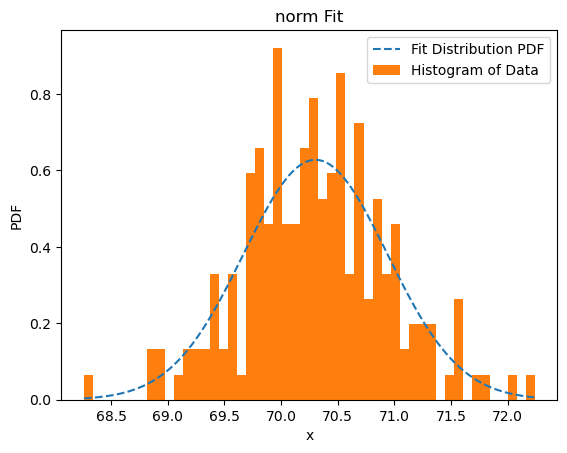

In [57]:
res.plot()
plt.show()

C:\Users\Fujitsu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


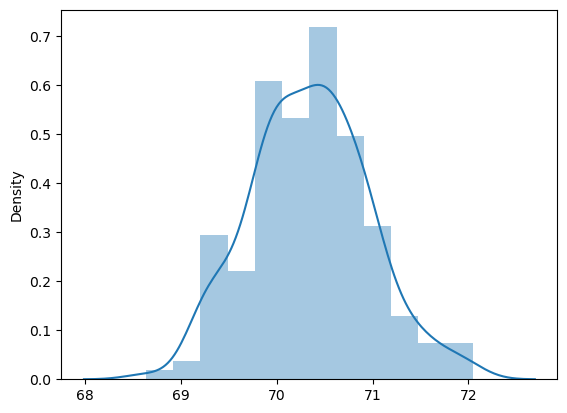

In [58]:
import seaborn as sns
from scipy.stats import norm

data = norm.rvs(70.30324607329841,0.6373654137997954,size=191) # you can use a pandas series or a list if you want

sns.distplot(data)
plt.show()

#  CORRELATION and LINEAR REGRESSION

In [59]:
correlation = np.corrcoef(RANK, AVG)
correlation

array([[1.        , 0.96395719],
       [0.96395719, 1.        ]])

In [60]:
x = RANK.reshape(-1,1)
y = AVG.reshape(-1,1)

In [61]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [62]:
lr.predict([[5]])

array([[69.29801337]])

In [63]:
pred_y = lr.predict(x)
pred_y

array([[69.25363069],
       [69.26472636],
       [69.27582203],
       [69.2869177 ],
       [69.2869177 ],
       [69.30910904],
       [69.32020471],
       [69.33130037],
       [69.34239604],
       [69.35349171],
       [69.36458738],
       [69.36458738],
       [69.38677872],
       [69.39787438],
       [69.39787438],
       [69.42006572],
       [69.43116139],
       [69.44225706],
       [69.45335273],
       [69.4644484 ],
       [69.4644484 ],
       [69.48663973],
       [69.4977354 ],
       [69.4977354 ],
       [69.51992674],
       [69.53102241],
       [69.54211807],
       [69.54211807],
       [69.54211807],
       [69.57540508],
       [69.57540508],
       [69.59759642],
       [69.59759642],
       [69.61978775],
       [69.63088342],
       [69.63088342],
       [69.65307476],
       [69.65307476],
       [69.6752661 ],
       [69.6752661 ],
       [69.69745743],
       [69.69745743],
       [69.71964877],
       [69.73074444],
       [69.74184011],
       [69

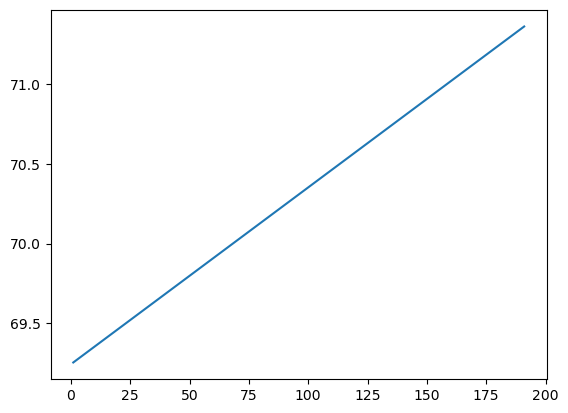

In [64]:
plt.plot(x,pred_y )
plt.show()

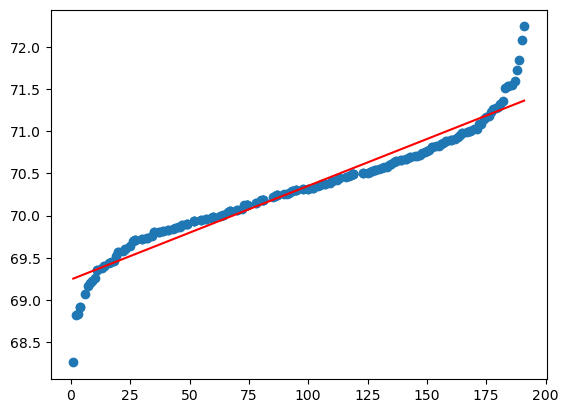

In [65]:
colour="red"
plt.scatter(x,y)
plt.plot(x,pred_y,colour )
plt.show()

In [66]:
df.SCORE

0      68.26
1      68.82
2      68.83
3      68.92
4      68.92
       ...  
186    71.60
187    71.72
188    71.84
189    72.08
190    72.24
Name: SCORE, Length: 191, dtype: float64

In [67]:
df.describe()

,RANK,SCORE,STROKES,ROUNDS
count,191.000000,191.000000,191.000000,191.000000
mean,95.596859,70.303246,6058.560209,86.225131
std,55.372326,0.637365,1134.245762,16.359018
min,1.000000,68.260000,3128.000000,44.000000
25%,48.000000,69.895000,5386.500000,76.000000
50%,95.000000,70.300000,6085.000000,87.000000
75%,143.000000,70.690000,6840.500000,97.000000
max,191.000000,72.240000,8450.000000,122.000000


In [68]:
count = df.count()
count

RANK       191
PLAYER     191
SCORE      191
STROKES    191
ROUNDS     191
TOUR       191
dtype: int64

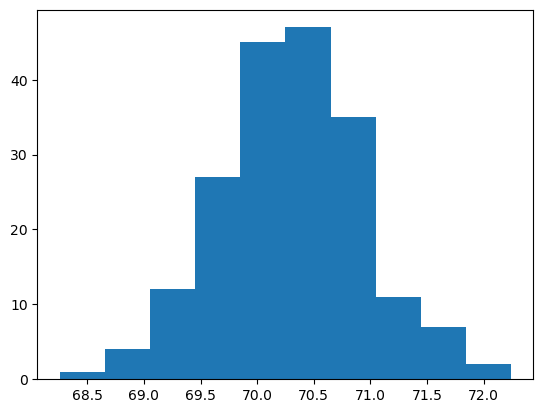

In [69]:
# Plot random normal distribution for Average Score
plt.hist(y)
plt.show()

In [70]:
x = np.array(x)
x

array([[  1],
       [  2],
       [  3],
       [  4],
       [  4],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 11],
       [ 13],
       [ 14],
       [ 14],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 20],
       [ 22],
       [ 23],
       [ 23],
       [ 25],
       [ 26],
       [ 27],
       [ 27],
       [ 27],
       [ 30],
       [ 30],
       [ 32],
       [ 32],
       [ 34],
       [ 35],
       [ 35],
       [ 37],
       [ 37],
       [ 39],
       [ 39],
       [ 41],
       [ 41],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 47],
       [ 49],
       [ 49],
       [ 49],
       [ 52],
       [ 52],
       [ 52],
       [ 55],
       [ 55],
       [ 57],
       [ 57],
       [ 59],
       [ 60],
       [ 60],
       [ 60],
       [ 63],
       [ 64],
       [ 64],
       [ 66],
       [ 67],
       [ 67],
       [ 67],
       [ 70],
       [ 70],
      

In [71]:
y = np.array(y)
y

array([[68.26],
       [68.82],
       [68.83],
       [68.92],
       [68.92],
       [69.07],
       [69.17],
       [69.2 ],
       [69.23],
       [69.26],
       [69.35],
       [69.35],
       [69.38],
       [69.4 ],
       [69.4 ],
       [69.44],
       [69.45],
       [69.46],
       [69.52],
       [69.57],
       [69.57],
       [69.58],
       [69.6 ],
       [69.6 ],
       [69.64],
       [69.7 ],
       [69.71],
       [69.71],
       [69.71],
       [69.72],
       [69.72],
       [69.74],
       [69.74],
       [69.76],
       [69.8 ],
       [69.8 ],
       [69.81],
       [69.81],
       [69.82],
       [69.82],
       [69.83],
       [69.83],
       [69.84],
       [69.85],
       [69.86],
       [69.87],
       [69.89],
       [69.89],
       [69.9 ],
       [69.9 ],
       [69.9 ],
       [69.94],
       [69.94],
       [69.94],
       [69.95],
       [69.95],
       [69.96],
       [69.96],
       [69.97],
       [69.98],
       [69.98],
       [69.98],
       [

In [72]:
#from scipy import stats
#dist = stats.norm
#data = y
#res = stats.fit(dist, data,bounds=[(69,73), (0, 50)])
#res

In [73]:
#res.params

In [74]:
#res.plot()
#plt.show()

In [75]:
#data = y

#sns.distplot(data)
#plt.show()

In [76]:
#ks.test(df, "pnorm", mean=mean, sd=std)

In [77]:
#fitdist(y, "norm")

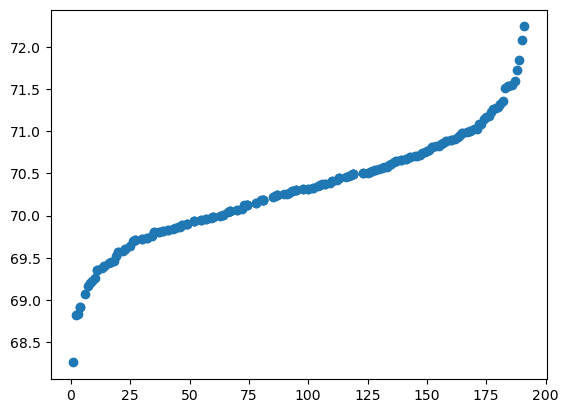

In [78]:
x = df.RANK
plt.scatter(x,y)
plt.show()

In [79]:
#correlation = np.corrcoef(x, y)
#correlation

In [80]:
#x = x.reshape(-1,1)
#y = y.reshape(-1,1)

In [81]:
#lr = LinearRegression()
#lr.fit(x,y)

In [82]:
#pred_y = lr.predict(x)
#pred_y

In [83]:
#plt.plot(x,pred_y )
#plt.show()

In [84]:
#colour="red"
#plt.scatter(x,y)
#plt.plot(x,pred_y,colour )
#plt.show()

In [85]:
# Synthesize a poisson distribution for Average Score
p = np.random.default_rng().poisson(mean, 191)
p

array([77, 58, 80, 65, 74, 67, 61, 67, 66, 65, 53, 64, 82, 75, 79, 65, 73,
       76, 72, 77, 60, 56, 78, 81, 70, 88, 54, 66, 75, 85, 62, 49, 79, 63,
       75, 68, 53, 69, 59, 63, 64, 63, 78, 72, 88, 51, 82, 81, 66, 72, 67,
       73, 77, 78, 67, 69, 92, 79, 76, 72, 76, 70, 80, 85, 70, 84, 83, 72,
       80, 50, 83, 54, 73, 75, 68, 61, 69, 72, 78, 75, 69, 83, 65, 74, 65,
       72, 82, 75, 81, 74, 67, 64, 57, 59, 57, 78, 87, 65, 70, 48, 84, 64,
       66, 81, 76, 67, 67, 77, 74, 76, 58, 87, 90, 85, 61, 71, 69, 63, 85,
       72, 86, 69, 68, 69, 83, 95, 63, 72, 70, 65, 85, 66, 73, 67, 72, 59,
       77, 82, 62, 56, 76, 71, 60, 74, 63, 85, 79, 71, 50, 88, 72, 70, 69,
       73, 75, 71, 63, 51, 58, 65, 74, 58, 64, 69, 72, 54, 82, 76, 74, 56,
       72, 69, 77, 80, 77, 85, 69, 65, 87, 71, 72, 71, 67, 72, 79, 68, 67,
       64, 73, 70, 79], dtype=int64)

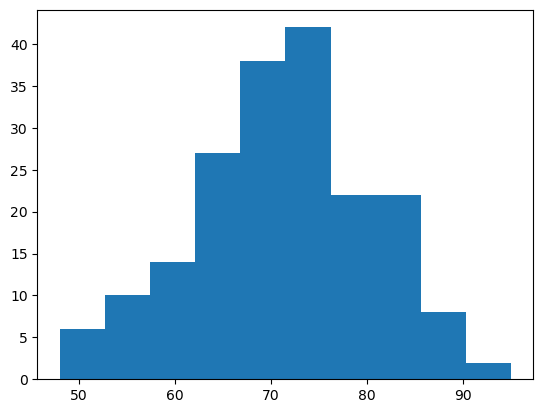

In [86]:
# Plot poisson distribution for Average Score
plt.hist(p)
plt.show()

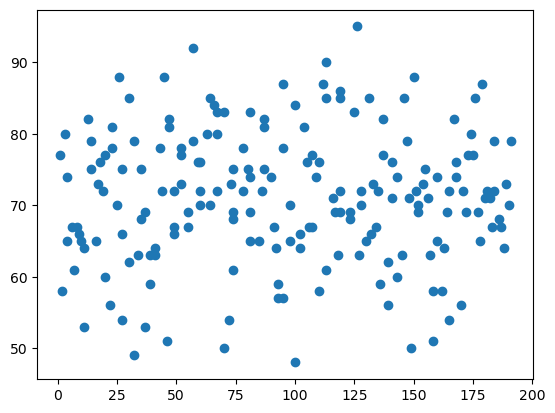

In [87]:
plt.scatter(x,p)
plt.show()

## SEABORN PAIRPLOTS

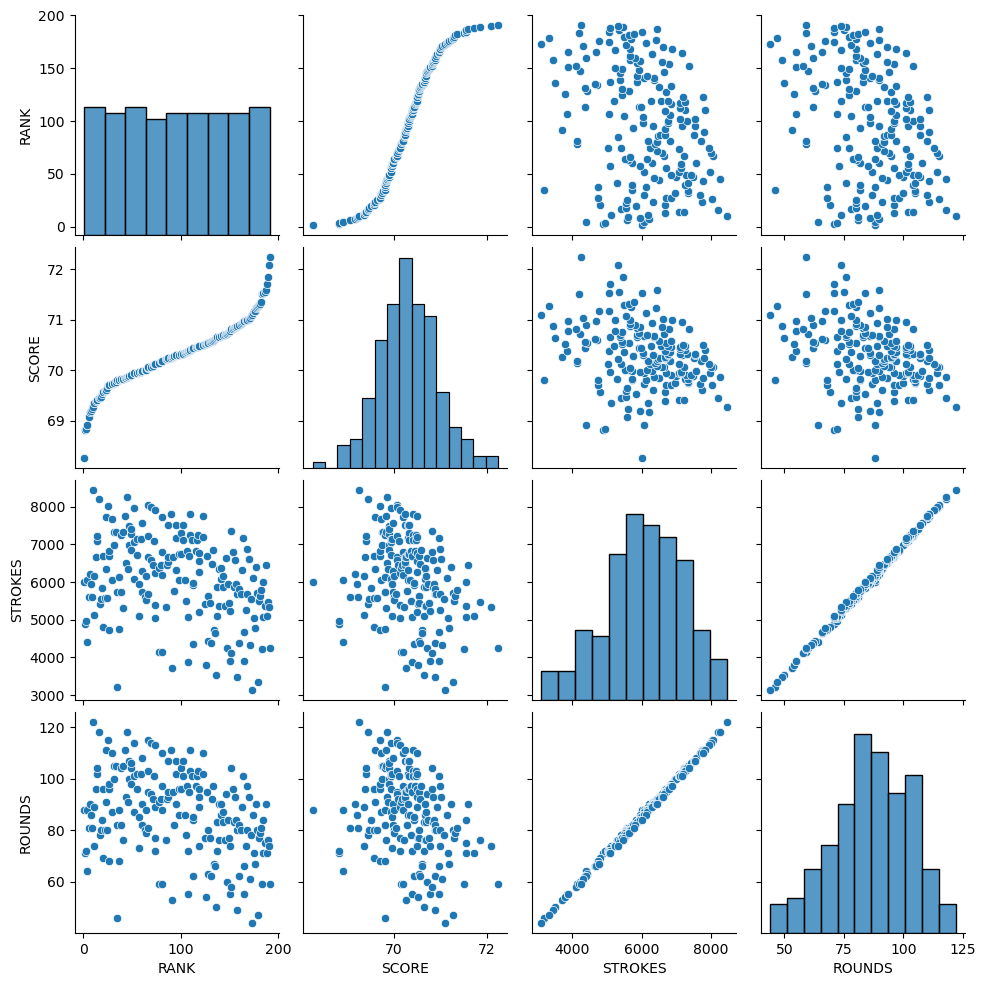

In [88]:
sns.pairplot(data=df)

In [89]:
#correlation = np.corrcoef(x, p)
#correlation

In [90]:
# https://www.pgatour.com/stats/detail/101
df1 = pd.read_csv('pgatour_golfstats_2022-2023_driving.csv')
df1

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG,TOTAL DISTANCE,TOTAL DRIVES
0,1,0,28237,Rory McIlroy,326.3,41771,128
1,2,0,51491,Brandon Matthews,321.3,37915,118
2,3,0,52372,Cameron Champ,318.8,47180,148
3,4,0,52453,Nicolai Hojgaard,317.7,29227,92
4,5,0,57366,Cameron Young,316.5,51902,164
...,...,...,...,...,...,...,...
184,185,-2,30927,Brendon Todd,282.8,54300,192
185,186,-2,40058,Zac Blair,282.4,42920,152
186,187,-2,31202,William McGirt,281.0,25292,90
187,188,-2,34409,David Lingmerth,279.2,45789,164


In [91]:
df1 = df1.drop('MOVEMENT', axis=1)
df1 = df1.drop('PLAYER_ID', axis=1)

In [92]:
df1["TOUR"] = "PGA TOUR"
df1

,RANK,PLAYER,AVG,TOTAL DISTANCE,TOTAL DRIVES,TOUR
0,1,Rory McIlroy,326.3,41771,128,PGA TOUR
1,2,Brandon Matthews,321.3,37915,118,PGA TOUR
2,3,Cameron Champ,318.8,47180,148,PGA TOUR
3,4,Nicolai Hojgaard,317.7,29227,92,PGA TOUR
4,5,Cameron Young,316.5,51902,164,PGA TOUR
...,...,...,...,...,...,...
184,185,Brendon Todd,282.8,54300,192,PGA TOUR
185,186,Zac Blair,282.4,42920,152,PGA TOUR
186,187,William McGirt,281.0,25292,90,PGA TOUR
187,188,David Lingmerth,279.2,45789,164,PGA TOUR


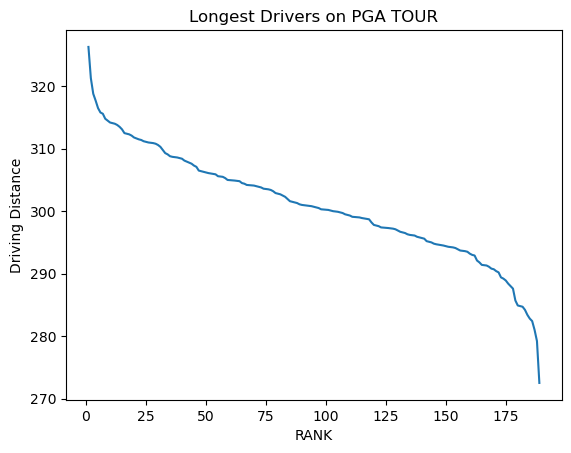

In [93]:
x = df1.RANK
y = df1.AVG
# Creating histogram 
fig, ax = plt.subplots(1, 1) 
ax.plot(x,y) 
  
# Set title 
ax.set_title("Longest Drivers on PGA TOUR") 
  
# adding labels 
ax.set_xlabel('RANK') 
ax.set_ylabel('Driving Distance') 

plt.show()

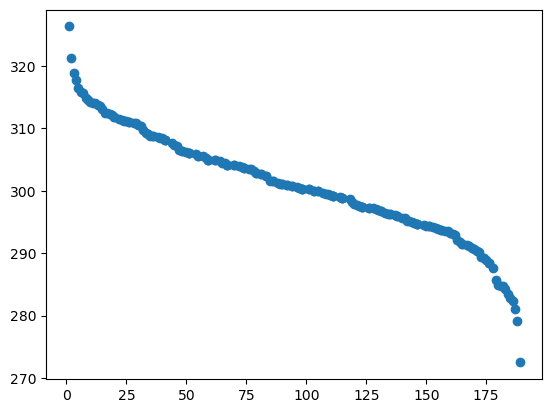

In [94]:
plt.scatter(x,y)
plt.show()

In [95]:
correlation = np.corrcoef(x, y)
correlation

array([[ 1.        , -0.97161469],
       [-0.97161469,  1.        ]])

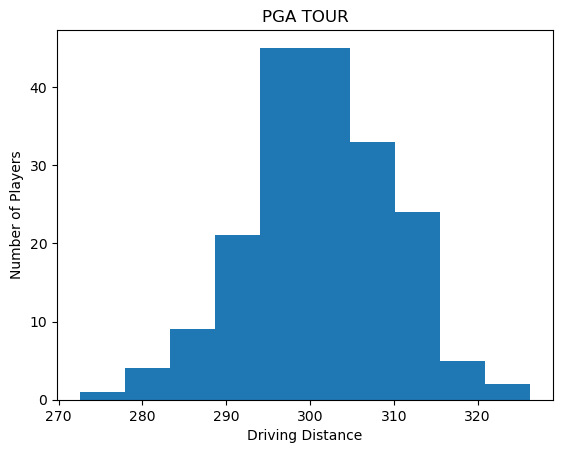

In [96]:
# Plot Driving Distance data from pgatour_golfstats_2022-2023_driving.csv
# Creating histogram 
fig, ax = plt.subplots(1, 1) 
ax.hist(y) 
  
# Set title 
ax.set_title("PGA TOUR") 
  
# adding labels 
ax.set_xlabel('Driving Distance') 
ax.set_ylabel('Number of Players') 

plt.show()

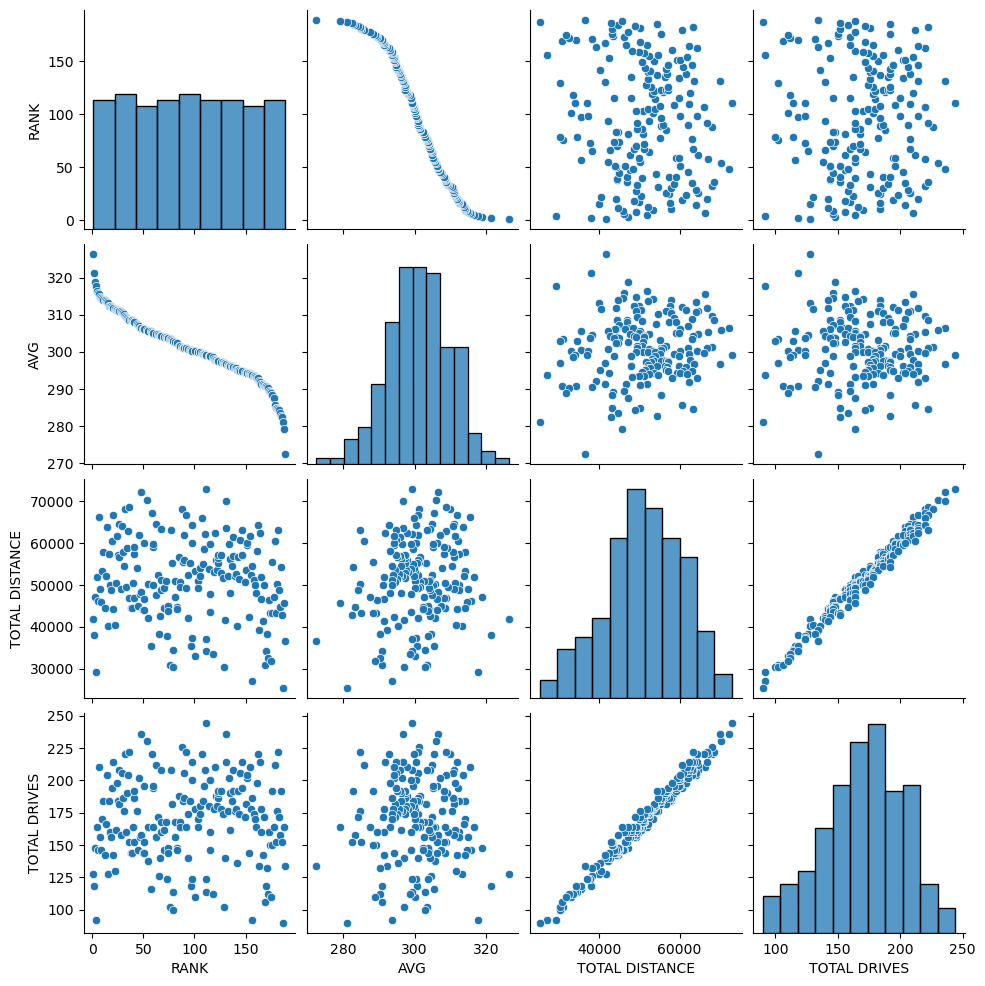

In [97]:
sns.pairplot(data=df1)

In [98]:
df1.AVG

0      326.3
1      321.3
2      318.8
3      317.7
4      316.5
       ...  
184    282.8
185    282.4
186    281.0
187    279.2
188    272.5
Name: AVG, Length: 189, dtype: float64

In [99]:
std = df1.AVG.std()
std

8.66203975287581

In [100]:
mean = df1.AVG.mean()
mean

300.96402116402106

In [101]:
df1.describe()

,RANK,AVG,TOTAL DISTANCE,TOTAL DRIVES
count,189.000000,189.000000,189.000000,189.00000
mean,94.719577,300.964021,51175.285714,170.05291
std,54.711144,8.662040,9840.011169,32.48334
min,1.000000,272.500000,25292.000000,90.00000
25%,48.000000,295.200000,44589.000000,148.00000
50%,94.000000,300.800000,51338.000000,172.00000
75%,142.000000,306.400000,57791.000000,192.00000
max,189.000000,326.300000,72978.000000,244.00000


In [102]:
count = df1.count()
count

RANK              189
PLAYER            189
AVG               189
TOTAL DISTANCE    189
TOTAL DRIVES      189
TOUR              189
dtype: int64

In [103]:
# Synthesize a random normal distribution for Driving Distance
# I choose mu of 300.5 because this is the average drivage distance in pgatour_golfstats_2022-2023_driving.csv
mu, sigma = 300.96, 8.66 # mean and standard deviation
s = np.random.default_rng().normal(mu, sigma, 189)
s

array([303.09277539, 301.7090808 , 296.56618711, 290.97664288,
       285.5544984 , 307.67070618, 308.14470425, 273.42060356,
       298.61167248, 289.59979473, 310.91628027, 317.86844829,
       305.88736939, 313.91824329, 291.37110273, 292.165352  ,
       295.14546374, 319.1773523 , 311.62270734, 297.94738229,
       300.31859809, 300.65866204, 298.88065279, 307.84346992,
       300.92338882, 290.30155974, 300.48699416, 298.69736066,
       313.81012726, 293.63917701, 300.95674161, 292.67902633,
       308.69478113, 301.57791591, 306.83731681, 305.48473554,
       314.00378443, 298.4938906 , 301.58256867, 291.32889422,
       297.53955028, 304.86483955, 294.43641219, 317.8160629 ,
       293.93771186, 295.85708309, 286.60331614, 289.08401183,
       304.61487653, 303.06072963, 303.4227046 , 307.18793092,
       306.17395466, 310.33092498, 276.51777725, 304.06144717,
       312.70618767, 296.21934834, 301.81233852, 308.80418842,
       300.66637168, 287.15310191, 318.1708342 , 286.93

In [104]:
x, counts = np.unique(s, return_counts=True)
x


array([273.42060356, 276.51777725, 284.98699714, 285.42688174,
       285.5544984 , 285.87386307, 286.48654328, 286.60331614,
       286.76787894, 286.93318831, 287.13402711, 287.15310191,
       287.60971846, 287.84811448, 288.41486268, 289.08401183,
       289.33313714, 289.59979473, 289.62738429, 290.16933855,
       290.30155974, 290.47370882, 290.61323527, 290.97664288,
       291.32889422, 291.37110273, 291.3975701 , 291.79213842,
       292.165352  , 292.38221383, 292.54235857, 292.67902633,
       292.96110376, 293.45341089, 293.63917701, 293.80029888,
       293.93771186, 294.43641219, 294.44859029, 294.93350336,
       294.97284499, 295.14546374, 295.19880555, 295.85708309,
       295.9131955 , 296.15454739, 296.21934834, 296.44145254,
       296.48372211, 296.56618711, 296.71824263, 296.75244068,
       296.79314693, 297.01488216, 297.08877552, 297.1672929 ,
       297.35818523, 297.41798247, 297.49165746, 297.50143068,
       297.52630349, 297.53955028, 297.87297475, 297.89

In [105]:
counts

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

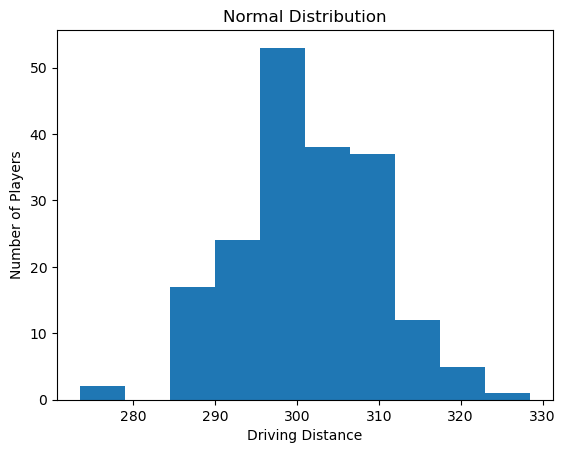

In [106]:
# Plot random normal distribution for Driving Distance
# Creating histogram 
fig, ax = plt.subplots(1, 1) 
ax.hist(s) 
  
# Set title 
ax.set_title("Normal Distribution") 
  
# adding labels 
ax.set_xlabel('Driving Distance') 
ax.set_ylabel('Number of Players') 

plt.show()

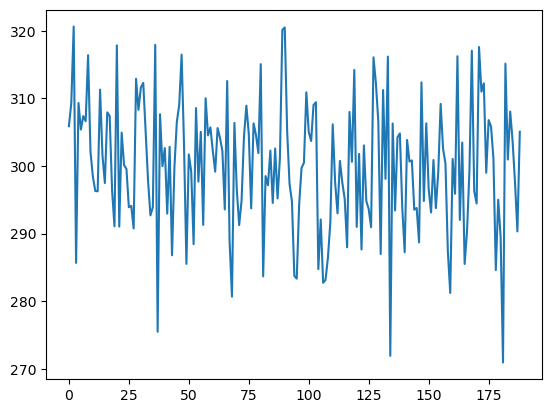

In [107]:
plt.plot(np.random.default_rng().normal(mu, sigma, 189))
plt.show()

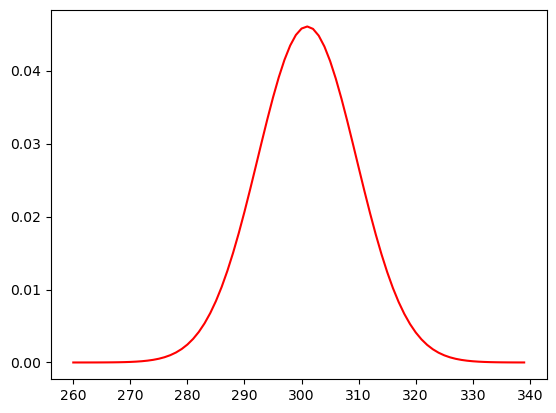

In [108]:
colour="red"
# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(260, 340, 1)
# Mean = 0, SD = 2.
plt.plot(x_axis, norm.pdf(x_axis,300.96402116402106,8.66203975287581),colour)
plt.show()

In [109]:
#def my_gauss(x, sigma=sigma, h=h, mean=mean):
#    from math import exp, pow
#    variance = pow(sigma, 2)
#    return h * exp(-pow(x-mean, 2)/(2*variance))

In [110]:
#h = 40
#mean = mean
#variance = pow(sigma, 2)
#sigma = math.sqrt(variance)
#x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1)
#plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma))
#plt.show()
#my_gauss

C:\Users\Fujitsu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Count'>

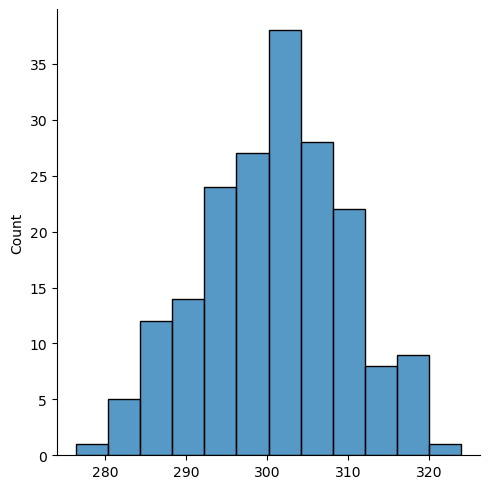

In [111]:
value = np.random.normal(loc=300.96402116402106,scale=8.66203975287581,size=189)
sns.displot(value)
sns.lineplot(value)

In [112]:
# Synthesize a poisson distribution for Driving Distance
mu=300.96402116402106
p = np.random.default_rng().poisson(mu, len(df1.index))
p

array([311, 321, 303, 311, 306, 306, 284, 293, 318, 297, 327, 284, 285,
       313, 282, 299, 305, 293, 274, 298, 283, 293, 270, 296, 287, 302,
       312, 346, 292, 297, 298, 305, 326, 304, 342, 306, 328, 305, 300,
       303, 304, 308, 290, 294, 315, 332, 290, 315, 301, 320, 293, 300,
       266, 294, 272, 311, 295, 276, 292, 305, 322, 288, 304, 319, 279,
       312, 304, 299, 285, 303, 313, 308, 278, 291, 314, 269, 292, 313,
       302, 306, 280, 288, 293, 315, 293, 304, 323, 316, 286, 291, 320,
       315, 283, 310, 286, 302, 309, 336, 330, 310, 299, 286, 282, 313,
       274, 262, 270, 308, 326, 287, 295, 303, 278, 318, 309, 316, 326,
       297, 281, 313, 283, 329, 290, 287, 327, 304, 279, 292, 284, 282,
       311, 286, 311, 324, 299, 285, 316, 329, 308, 278, 267, 301, 295,
       324, 294, 305, 301, 307, 295, 296, 305, 295, 294, 312, 289, 286,
       326, 301, 314, 298, 277, 323, 296, 312, 311, 311, 310, 319, 284,
       316, 274, 303, 313, 308, 317, 307, 296, 277, 303, 294, 29

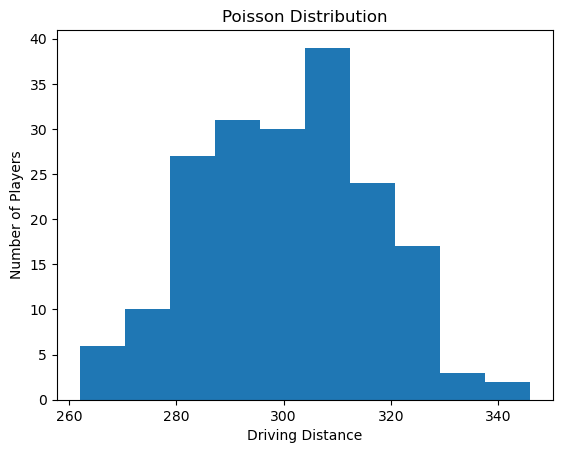

In [113]:
# Plot poisson distribution for Driving Distance

# Creating histogram 
fig, ax = plt.subplots(1, 1) 
ax.hist(p) 
  
# Set title 
ax.set_title("Poisson Distribution") 
  
# adding labels 
ax.set_xlabel('Driving Distance') 
ax.set_ylabel('Number of Players') 

plt.show()

In [114]:
dataframe1 = pd.read_excel('dpworldtour_2022-2023_scoringaverage.xlsx')
dataframe1

,RANK,COUNTRY,PLAYER,TOTAL ROUNDS,AVG,TOUR
0,1,NaN,"MCILROY, Rory",30,68.80,DP World Tour
1,2,NaN,"BJÖRK, Alexander",88,69.53,DP World Tour
2,3,NaN,"HØJGAARD, Nicolai",61,69.59,DP World Tour
3,4,NaN,"KIMSEY, Nathan",76,69.74,DP World Tour
4,5,NaN,"OLESEN, Thorbjørn",84,69.80,DP World Tour
...,...,...,...,...,...,...
169,170,NaN,"MURPHY, John",51,73.86,DP World Tour
170,171,NaN,"LI, Haotong",43,74.07,DP World Tour
171,172,NaN,"WINDRED, Blake",34,74.18,DP World Tour
172,173,NaN,"CHENGYAO, Ma",40,74.83,DP World Tour


In [115]:
dataframe1 = dataframe1.drop('COUNTRY',axis=1)

In [116]:
dataframe1

,RANK,PLAYER,TOTAL ROUNDS,AVG,TOUR
0,1,"MCILROY, Rory",30,68.80,DP World Tour
1,2,"BJÖRK, Alexander",88,69.53,DP World Tour
2,3,"HØJGAARD, Nicolai",61,69.59,DP World Tour
3,4,"KIMSEY, Nathan",76,69.74,DP World Tour
4,5,"OLESEN, Thorbjørn",84,69.80,DP World Tour
...,...,...,...,...,...
169,170,"MURPHY, John",51,73.86,DP World Tour
170,171,"LI, Haotong",43,74.07,DP World Tour
171,172,"WINDRED, Blake",34,74.18,DP World Tour
172,173,"CHENGYAO, Ma",40,74.83,DP World Tour


In [117]:
print(dataframe1.columns)

Index(['RANK', 'PLAYER', 'TOTAL ROUNDS', 'AVG', 'TOUR'], dtype='object')


In [118]:
#dataframe1.columns = ['RANK', 'Unnamed: 1', 'PLAYER', 'ROUNDS', 'AVG', 'TOUR']
dataframe1.columns

Index(['RANK', 'PLAYER', 'TOTAL ROUNDS', 'AVG', 'TOUR'], dtype='object')

In [119]:
dataframe1.iloc[0]

RANK                        1
PLAYER          MCILROY, Rory
TOTAL ROUNDS               30
AVG                      68.8
TOUR            DP World Tour
Name: 0, dtype: object

In [120]:
concat = pd.concat([df, dataframe1], ignore_index=True)
concat

,RANK,PLAYER,SCORE,STROKES,ROUNDS,TOUR,TOTAL ROUNDS,AVG
0,1,Scottie Scheffler,68.26,6007.0,88.0,PGA TOUR,NaN,NaN
1,2,Jon Rahm,68.82,4886.0,71.0,PGA TOUR,NaN,NaN
2,3,Patrick Cantlay,68.83,4956.0,72.0,PGA TOUR,NaN,NaN
3,4,Viktor Hovland,68.92,6065.0,88.0,PGA TOUR,NaN,NaN
4,4,Rory McIlroy,68.92,4411.0,64.0,PGA TOUR,NaN,NaN
...,...,...,...,...,...,...,...,...
360,170,"MURPHY, John",NaN,NaN,NaN,DP World Tour,51.0,73.86
361,171,"LI, Haotong",NaN,NaN,NaN,DP World Tour,43.0,74.07
362,172,"WINDRED, Blake",NaN,NaN,NaN,DP World Tour,34.0,74.18
363,173,"CHENGYAO, Ma",NaN,NaN,NaN,DP World Tour,40.0,74.83


In [121]:
pgatour = concat[concat['TOUR']=='PGA TOUR']
dpworldtour = concat[concat['TOUR']=='DP World Tour']

In [122]:
pgatour.mean()

C:\Users\Fujitsu\AppData\Local\Temp\ipykernel_18416\2823721802.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pgatour.mean()


RANK              95.596859
SCORE             70.303246
STROKES         6058.560209
ROUNDS            86.225131
TOTAL ROUNDS            NaN
AVG                     NaN
dtype: float64

In [123]:
dpworldtour.mean()

C:\Users\Fujitsu\AppData\Local\Temp\ipykernel_18416\1499420383.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dpworldtour.mean()


RANK            87.500000
SCORE                 NaN
STROKES               NaN
ROUNDS                NaN
TOTAL ROUNDS    68.563218
AVG             71.273161
dtype: float64

In [124]:
mean_groupby = concat.groupby(['TOUR']).AVG.mean()
mean_groupby

TOUR
DP World Tour    71.273161
PGA TOUR               NaN
Name: AVG, dtype: float64

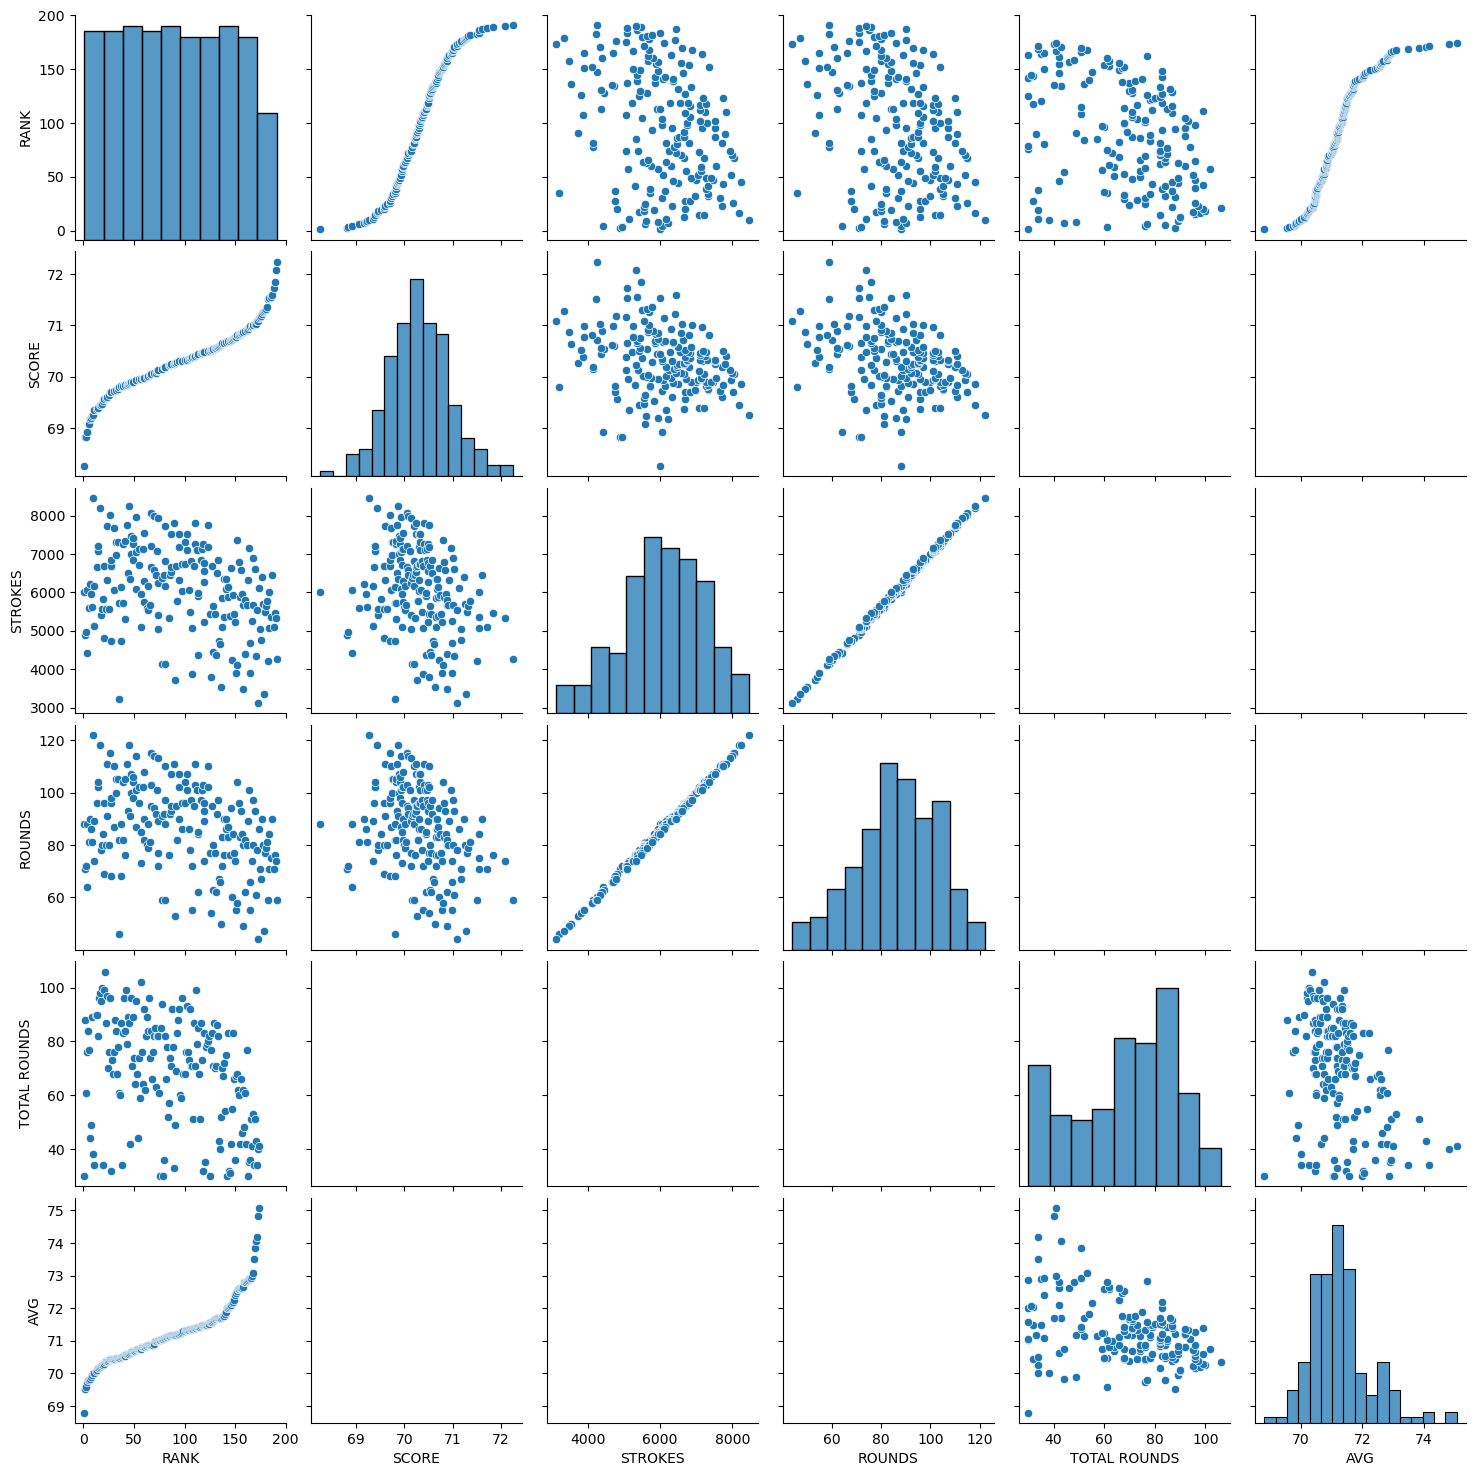

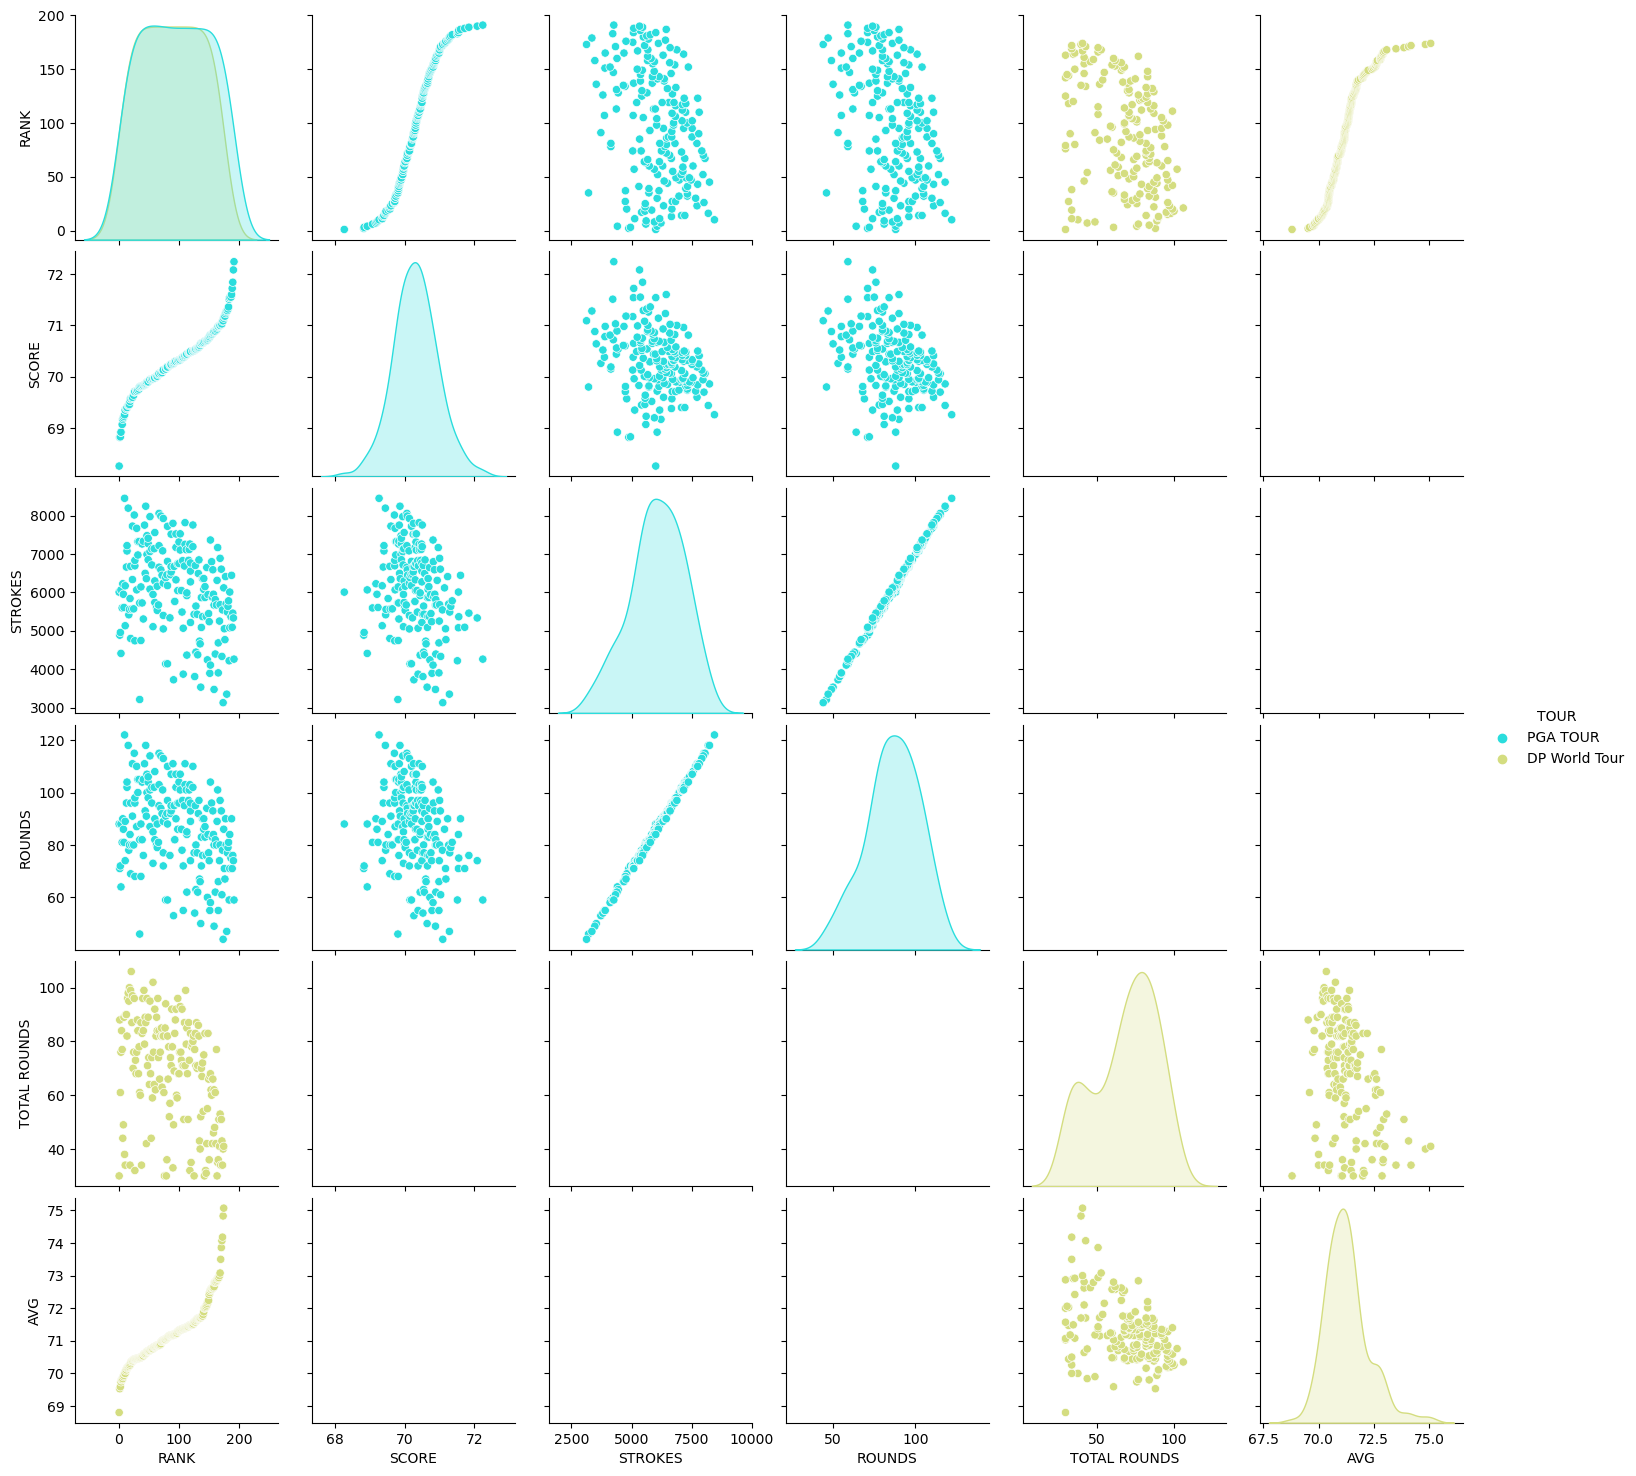

In [125]:
sns.pairplot(data = concat)
sns.pairplot(concat, hue="TOUR", palette="rainbow")

## TIME SERIES

In [126]:
dataframe2 = pd.read_excel('Shane Lowry_2022-2-23_Results_time-series.xlsx')
dataframe2

,DATE,TOURNAMENT,POS,R1,R2,R3,R4,R5,TOTAL,TO PAR,RANK,PTS,Unnamed: 12,RANK.1,PTS.1,WINNINGS,Unnamed: 16
0,10.23.2022,THE CJ CUP in South Carolina,T23,68,67,71,72,-,278.0,-6,99,34.833,NaN,-,-,"$88,305.00",NaN
1,12.4.2022,Hero World Challenge*,18,74,77,71,71,-,293.0,5,-,-,NaN,-,-,"$102,000.00",-
2,2.12.2023,WM Phoenix Open,CUT,75,76,-,-,-,151.0,9,180,-,NaN,-,-,-,NaN
3,2.19.2023,The Genesis Invitational,T14,69,69,71,68,-,277.0,-7,131,58.25,NaN,-,-,"$355,000.00",NaN
4,2.26.2023,The Honda Classic,T5,68,68,65,70,-,271.0,-9,89,93,NaN,-,-,"$288,120.00",NaN
5,3.5.2023,Arnold Palmer Invitational presented by Master...,67,72,70,80,71,-,293.0,5,97,4.08,NaN,-,-,"$42,600.00",NaN
6,3.12.2023,THE PLAYERS Championship,T35,77,69,68,70,-,284.0,-4,96,19.267,NaN,-,-,"$114,166.67",NaN
7,3.26.2023,World Golf Championships-Dell Technologies Mat...,T31,-,-,-,-,-,0.0,NaN,97,17.729,NaN,-,-,"$113,761.91",NaN
8,4.9.2023,Masters Tournament,T16,68,72,73,73,-,286.0,-2,88,52.886,NaN,-,-,"$261,000.00",-
9,4.16.2023,RBC Heritage,T67,70,69,74,72,-,285.0,1,90,3.3,NaN,-,-,"$41,600.00",NaN


In [127]:
dataframe2['datetime'] = pd.to_datetime(dataframe2['DATE'])
dataframe2

,DATE,TOURNAMENT,POS,R1,R2,R3,R4,R5,TOTAL,TO PAR,RANK,PTS,Unnamed: 12,RANK.1,PTS.1,WINNINGS,Unnamed: 16,datetime
0,10.23.2022,THE CJ CUP in South Carolina,T23,68,67,71,72,-,278.0,-6,99,34.833,NaN,-,-,"$88,305.00",NaN,2022-10-23
1,12.4.2022,Hero World Challenge*,18,74,77,71,71,-,293.0,5,-,-,NaN,-,-,"$102,000.00",-,2022-12-04
2,2.12.2023,WM Phoenix Open,CUT,75,76,-,-,-,151.0,9,180,-,NaN,-,-,-,NaN,2023-02-12
3,2.19.2023,The Genesis Invitational,T14,69,69,71,68,-,277.0,-7,131,58.25,NaN,-,-,"$355,000.00",NaN,2023-02-19
4,2.26.2023,The Honda Classic,T5,68,68,65,70,-,271.0,-9,89,93,NaN,-,-,"$288,120.00",NaN,2023-02-26
5,3.5.2023,Arnold Palmer Invitational presented by Master...,67,72,70,80,71,-,293.0,5,97,4.08,NaN,-,-,"$42,600.00",NaN,2023-03-05
6,3.12.2023,THE PLAYERS Championship,T35,77,69,68,70,-,284.0,-4,96,19.267,NaN,-,-,"$114,166.67",NaN,2023-03-12
7,3.26.2023,World Golf Championships-Dell Technologies Mat...,T31,-,-,-,-,-,0.0,NaN,97,17.729,NaN,-,-,"$113,761.91",NaN,2023-03-26
8,4.9.2023,Masters Tournament,T16,68,72,73,73,-,286.0,-2,88,52.886,NaN,-,-,"$261,000.00",-,2023-04-09
9,4.16.2023,RBC Heritage,T67,70,69,74,72,-,285.0,1,90,3.3,NaN,-,-,"$41,600.00",NaN,2023-04-16


In [128]:
dataframe2['datetime']

0    2022-10-23
1    2022-12-04
2    2023-02-12
3    2023-02-19
4    2023-02-26
5    2023-03-05
6    2023-03-12
7    2023-03-26
8    2023-04-09
9    2023-04-16
10   2023-05-07
11   2023-05-21
12   2023-06-04
13   2023-06-11
14   2023-06-18
15   2023-06-25
16   2023-07-16
17   2023-07-23
18   2023-08-06
19   2023-10-01
Name: datetime, dtype: datetime64[ns]

<AxesSubplot:xlabel='datetime', ylabel='WINNINGS'>

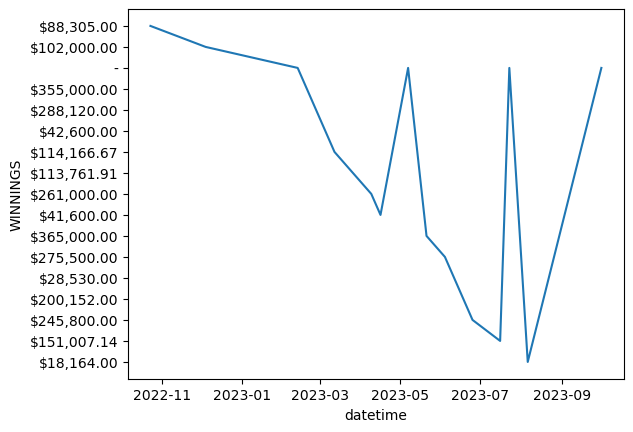

In [129]:
import seaborn as sns
sns.lineplot(data=dataframe2, x="datetime", y="WINNINGS")

In [130]:
dti = pd.date_range("2022-10-23", periods=52, freq="W")
len(dti)
dti

DatetimeIndex(['2022-10-23', '2022-10-30', '2022-11-06', '2022-11-13',
               '2022-11-20', '2022-11-27', '2022-12-04', '2022-12-11',
               '2022-12-18', '2022-12-25', '2023-01-01', '2023-01-08',
               '2023-01-15', '2023-01-22', '2023-01-29', '2023-02-05',
               '2023-02-12', '2023-02-19', '2023-02-26', '2023-03-05',
               '2023-03-12', '2023-03-19', '2023-03-26', '2023-04-02',
               '2023-04-09', '2023-04-16', '2023-04-23', '2023-04-30',
               '2023-05-07', '2023-05-14', '2023-05-21', '2023-05-28',
               '2023-06-04', '2023-06-11', '2023-06-18', '2023-06-25',
               '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23',
               '2023-07-30', '2023-08-06', '2023-08-13', '2023-08-20',
               '2023-08-27', '2023-09-03', '2023-09-10', '2023-09-17',
               '2023-09-24', '2023-10-01', '2023-10-08', '2023-10-15'],
              dtype='datetime64[ns]', freq='W-SUN')

In [131]:
winnings = dataframe2['WINNINGS']
winnings

0      $88,305.00
1     $102,000.00
2               -
3     $355,000.00
4     $288,120.00
5      $42,600.00
6     $114,166.67
7     $113,761.91
8     $261,000.00
9      $41,600.00
10              -
11    $365,000.00
12    $275,500.00
13     $28,530.00
14    $200,152.00
15    $245,800.00
16    $151,007.14
17              -
18     $18,164.00
19              -
Name: WINNINGS, dtype: object

In [132]:
dataframe2['WINNINGS'] = dataframe2['WINNINGS'].replace({r'\$':''}, regex = True)
dataframe2['WINNINGS'] = dataframe2['WINNINGS'].replace({r'\,':''}, regex = True)
dataframe2['WINNINGS'] = dataframe2['WINNINGS'].replace({r'\-':'0'}, regex = True)
winnings = dataframe2['WINNINGS']
winnings

0      88305.00
1     102000.00
2             0
3     355000.00
4     288120.00
5      42600.00
6     114166.67
7     113761.91
8     261000.00
9      41600.00
10            0
11    365000.00
12    275500.00
13     28530.00
14    200152.00
15    245800.00
16    151007.14
17            0
18     18164.00
19            0
Name: WINNINGS, dtype: object

In [133]:
dataframe2['WINNINGS'] = pd.to_numeric(dataframe2['WINNINGS'])
dataframe2['WINNINGS']

0      88305.00
1     102000.00
2          0.00
3     355000.00
4     288120.00
5      42600.00
6     114166.67
7     113761.91
8     261000.00
9      41600.00
10         0.00
11    365000.00
12    275500.00
13     28530.00
14    200152.00
15    245800.00
16    151007.14
17         0.00
18     18164.00
19         0.00
Name: WINNINGS, dtype: float64

<AxesSubplot:xlabel='datetime', ylabel='WINNINGS'>

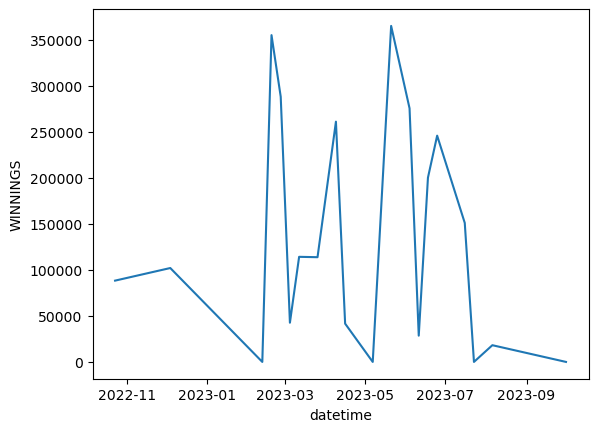

In [134]:
sns.lineplot(data=dataframe2, x="datetime", y="WINNINGS")

In [135]:
#sns.pairplot(data=dataframe2)

In [136]:
mean = dataframe2.WINNINGS.mean()
mean

134535.336

In [137]:
sigma = dataframe2.WINNINGS.std()
sigma

124907.89379401015

In [138]:
rng = np.random.default_rng() 
d = rng.poisson(mean, len(dti))
df = pd.DataFrame(data=d, index = dti)
df.head()

,0
2022-10-23,134759
2022-10-30,135160
2022-11-06,134649
2022-11-13,134957
2022-11-20,134478


In [139]:
df.columns =['WINNINGS']
df.head()

,WINNINGS
2022-10-23,134759
2022-10-30,135160
2022-11-06,134649
2022-11-13,134957
2022-11-20,134478


<AxesSubplot:ylabel='WINNINGS'>

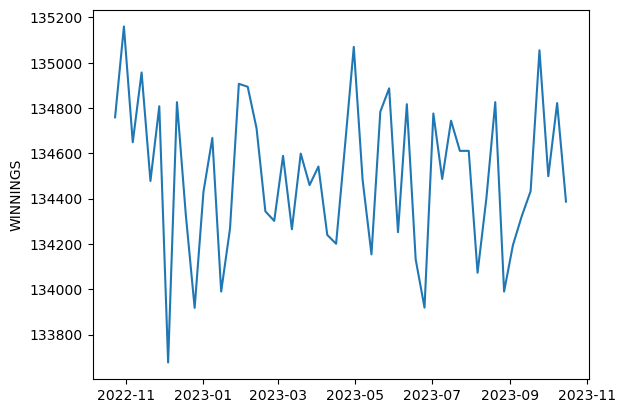

In [140]:
sns.lineplot(data=df, x=df.index, y="WINNINGS")

<AxesSubplot:>

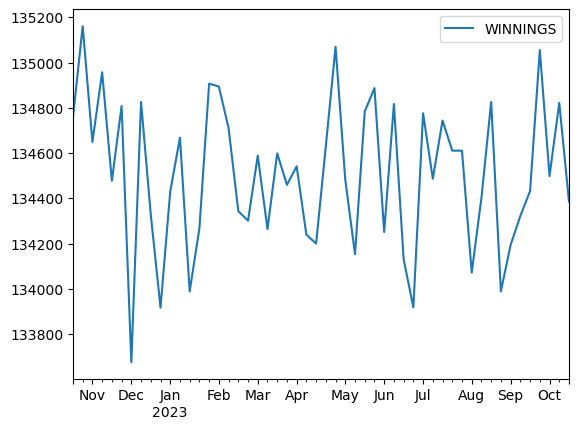

In [141]:
df.plot(y="WINNINGS")

In [142]:
d = rng.normal(mean,sigma,len(dti))
df = pd.DataFrame(data=d, index = dti)
df.head()

,0
2022-10-23,6640.395068
2022-10-30,148745.589720
2022-11-06,295126.305305
2022-11-13,130493.340229
2022-11-20,57170.765173


In [143]:
df.columns =['WINNINGS']
df.head()

,WINNINGS
2022-10-23,6640.395068
2022-10-30,148745.589720
2022-11-06,295126.305305
2022-11-13,130493.340229
2022-11-20,57170.765173


<AxesSubplot:>

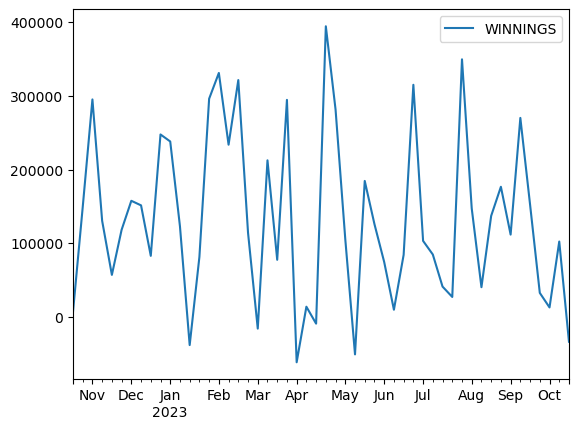

In [144]:
df.plot(y="WINNINGS")

<AxesSubplot:ylabel='WINNINGS'>

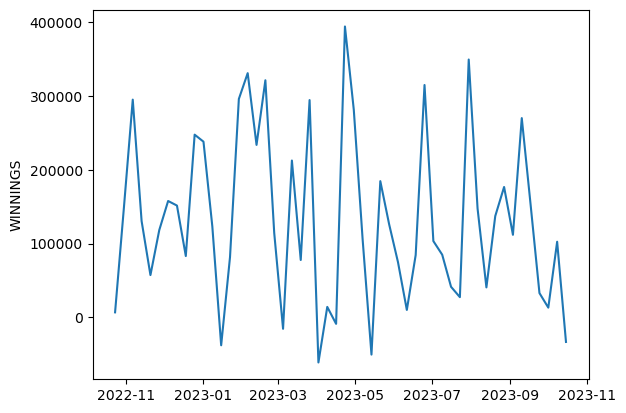

In [145]:
sns.lineplot(data=df, x=df.index, y="WINNINGS")

In [146]:
#sns.pairplot(data=df)

In [147]:
def my_gauss(x, sigma=sigma, h=450000, mean=mean):
    from math import exp, pow
    variance = pow(sigma, 2)
    return h * exp(-pow(x-mean, 2)/(2*variance))

In [148]:
x=df.WINNINGS
yg = [my_gauss(xi) for xi in x]
yg

[266412.97568049777,
 447097.3014426751,
 196914.0514823885,
 449764.45126924466,
 371458.13140124327,
 446209.7929239269,
 442349.0523894966,
 445885.7544880558,
 413303.4768615998,
 298674.86797081545,
 319086.7551773205,
 448125.7602390191,
 173305.65683766318,
 411319.7444020329,
 194999.92081093046,
 130557.16166574218,
 328267.4416529729,
 146969.503003981,
 444173.21184899344,
 218375.87714791155,
 370251.8776397253,
 405666.5967214096,
 198101.96817266307,
 131602.2917173425,
 282567.76763293764,
 232661.91684018224,
 51737.45488532618,
 225453.55171941803,
 438024.67606148246,
 149966.9851070693,
 415286.9593160153,
 448944.7314069984,
 401157.11114020273,
 273534.0795833753,
 415120.27872488723,
 158514.2789468052,
 436147.1520443543,
 415744.44934016734,
 340577.9171552631,
 311195.8140167006,
 102312.13617222861,
 447600.42092465324,
 338930.24162494356,
 449896.7617327408,
 425106.4374581661,
 442621.37817398837,
 249762.30604751763,
 445362.2237696116,
 322916.5516996787,

(array([ 1.,  2.,  4.,  5.,  4.,  4.,  5.,  3.,  3., 21.]),
 array([ 51737.45488533,  91553.38557007, 131369.31625481, 171185.24693955,
        211001.17762429, 250817.10830903, 290633.03899377, 330448.96967852,
        370264.90036326, 410080.831048  , 449896.76173274]),
 <BarContainer object of 10 artists>)

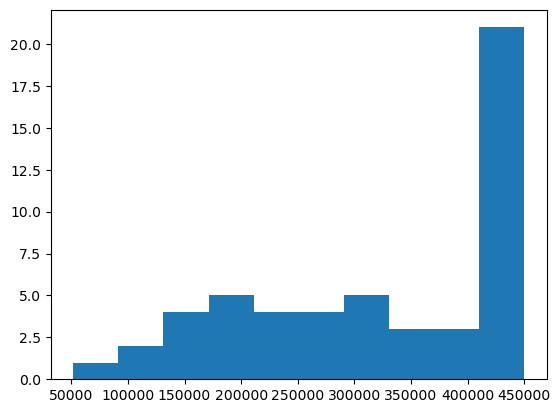

In [149]:
plt.hist(yg)

In [150]:
# Range of x values for plotting.
x = np.linspace(250, 350, 189)
x

array([250.        , 250.53191489, 251.06382979, 251.59574468,
       252.12765957, 252.65957447, 253.19148936, 253.72340426,
       254.25531915, 254.78723404, 255.31914894, 255.85106383,
       256.38297872, 256.91489362, 257.44680851, 257.9787234 ,
       258.5106383 , 259.04255319, 259.57446809, 260.10638298,
       260.63829787, 261.17021277, 261.70212766, 262.23404255,
       262.76595745, 263.29787234, 263.82978723, 264.36170213,
       264.89361702, 265.42553191, 265.95744681, 266.4893617 ,
       267.0212766 , 267.55319149, 268.08510638, 268.61702128,
       269.14893617, 269.68085106, 270.21276596, 270.74468085,
       271.27659574, 271.80851064, 272.34042553, 272.87234043,
       273.40425532, 273.93617021, 274.46808511, 275.        ,
       275.53191489, 276.06382979, 276.59574468, 277.12765957,
       277.65957447, 278.19148936, 278.72340426, 279.25531915,
       279.78723404, 280.31914894, 280.85106383, 281.38297872,
       281.91489362, 282.44680851, 282.9787234 , 283.51

In [151]:
#f(x)

In [152]:
# Create empty plot.
#fig, ax = plt.subplots(figsize=(12, 4))

# Plot f(x).
#ax.plot(x, f(x));

In [153]:
rng.integers(10,25)

22

In [154]:
rng.integers(100, size=10)

array([39, 36, 75, 66, 24, 87,  2, 52, 25, 76], dtype=int64)

In [155]:
rng.integers(50,100, size=10)

array([66, 75, 64, 86, 54, 74, 60, 92, 56, 52], dtype=int64)

In [156]:
rng.integers(100, size=(191,2))

array([[20, 92,  7, 18],
       [46, 58, 39, 95]], dtype=int64)

In [157]:
rng.random()

0.7036984214498703

In [158]:
rng.random(5)

array([0.43670085, 0.22950638, 0.38501586, 0.08436702, 0.27178656])

In [159]:
rng.random((5,4))

array([[0.76190981, 0.38606021, 0.10605361, 0.34056236],
       [0.89213589, 0.83040349, 0.02905856, 0.86361098],
       [0.91218649, 0.81555143, 0.66083308, 0.07118943],
       [0.23388375, 0.00345179, 0.89574356, 0.1510476 ],
       [0.61513002, 0.98137092, 0.16028919, 0.41247323]])

In [160]:
x = rng.random(1000000)
x

array([0.79305186, 0.91747542, 0.41432757, ..., 0.16356661, 0.63663671,
       0.30659808])

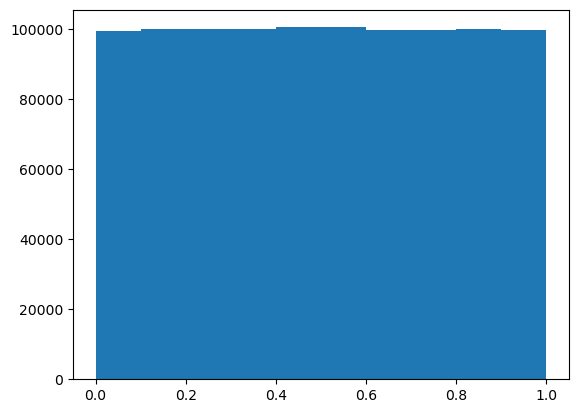

In [161]:
import matplotlib.pyplot as plt
plt.hist(x)
plt.show()

In [162]:
rng = np.random.default_rng(seed=43)
x = rng.random()
print(x)

0.6522992627009107


In [163]:
rng = np.random.default_rng(seed=44)
x = rng.integers(10)
print(x)

6


In [164]:
rng = np.random.default_rng(seed=43)
x = rng.random((2,4))
print(x)

[[0.65229926 0.04377532 0.02002959 0.83921258]
 [0.58714305 0.22470523 0.75179227 0.2636922 ]]


In [165]:
rng = np.random.default_rng(seed=43)
x = rng.integers(50,100,size=(3,3))
print(x)

[[75 82 70]
 [52 78 51]
 [63 91 73]]


# RESULTS

In [166]:
syn_df

,RANK,AVERAGE,STROKES,ROUNDS,TOUR
0,1,68.78,5926,97,PGA TOUR
1,1,69.03,6261,100,PGA TOUR
2,2,69.06,6626,115,PGA TOUR
3,2,69.09,5589,71,PGA TOUR
4,3,69.10,6892,71,PGA TOUR
...,...,...,...,...,...
186,184,71.70,7977,93,PGA TOUR
187,186,71.91,3856,96,PGA TOUR
188,186,71.95,6290,92,PGA TOUR
189,189,72.00,7487,101,PGA TOUR


# CONCLUSION

# REFERENCES / RESEARCH

Random sampling (numpy.random)
https://numpy.org/doc/stable/reference/random/index.html#module-numpy.random

Set decimal precision of a pandas dataframe column with a datatype of Decimal
https://stackoverflow.com/questions/66969078/set-decimal-precision-of-a-pandas-dataframe-column-with-a-datatype-of-decimal

Populate Pandas Dataframe with normal distribution
https://stackoverflow.com/questions/58996519/populate-pandas-dataframe-with-normal-distribution

How to create a DataFrame of random integers with Pandas?
https://stackoverflow.com/questions/32752292/how-to-create-a-dataframe-of-random-integers-with-pandas

Discrete uniform distribution
https://en.wikipedia.org/wiki/Discrete_uniform_distribution

Normal distribution
https://en.wikipedia.org/wiki/Normal_distribution

How to choose number of bins in numpy.histogram?
https://stackoverflow.com/questions/47607250/how-to-choose-number-of-bins-in-numpy-histogram

Count number of elements in a specific bin
https://stackoverflow.com/questions/55482071/count-number-of-elements-in-a-specific-bin

Exploratory data analysis in Python.
https://nbviewer.org/github/Tanu-N-Prabhu/Python/blob/master/Exploratory_data_Analysis.ipynb

How to add a new column to an existing DataFrame
https://stackoverflow.com/questions/12555323/how-to-add-a-new-column-to-an-existing-dataframe

GOLF STATISTICS
https://datagolf.com/

The synthetic data platform for developers.
https://gretel.ai/

Change the data type of a column or a Pandas Series
https://www.geeksforgeeks.org/change-the-data-type-of-a-column-or-a-pandas-series/

Fitting a Normal distribution to 1D data
https://stackoverflow.com/questions/20011122/fitting-a-normal-distribution-to-1d-data

SCIPY FIT FUNCTION
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fit.html#scipy.stats.fit

Fitting empirical distribution to theoretical ones with Scipy (Python)?
https://stackoverflow.com/questions/6620471/fitting-empirical-distribution-to-theoretical-ones-with-scipy-python

SK LEARN Linear Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

API for numpy.random.Generator.poisson distribution method
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html#numpy.random.Generator.poisson

API for pandas.DataFrame
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame

Pandas Time Series function
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

Remove Dollar Sign from Entire Python Pandas Dataframe
https://stackoverflow.com/questions/43096522/remove-dollar-sign-from-entire-python-pandas-dataframe

Merge, join, concatenate and compare Dataframes
https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

Create DataFrame with multiple arrays by column
https://stackoverflow.com/questions/65666164/create-dataframe-with-multiple-arrays-by-column

numpy.sort API
https://numpy.org/doc/stable/reference/generated/numpy.sort.html